In [1]:
from funcs import *
% matplotlib inline

Using TensorFlow backend.


# Data

In [2]:
df = pd.read_excel('serieses.xlsx')

# US Federal effective rate

In [3]:
tf_ef_r = df.iloc[18, 1:].copy()
tf_ef_r.index = pd.DatetimeIndex(start='1954-07', end='2015-06', freq='M')

Results of Dickey-Fuller Test:
Test Statistic                  -2.682761
p-value                          0.077069
#Lags Used                      17.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (10%)            -2.568933
Critical Value (5%)             -2.865602
dtype: float64


Results of KPSS Test:
Test Statistic            0.797743
p-value                   0.010000
#Lags Used               20.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


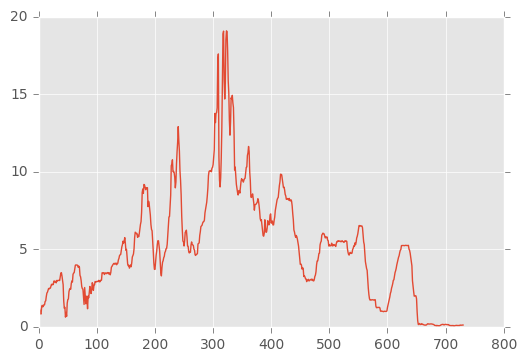

In [4]:
test_stationarity(tf_ef_r)

Results of Dickey-Fuller Test:
Test Statistic                -5.984594e+00
p-value                        1.804735e-07
#Lags Used                     1.800000e+01
Number of Observations Used    7.110000e+02
Critical Value (1%)           -3.439581e+00
Critical Value (10%)          -2.568939e+00
Critical Value (5%)           -2.865614e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.115789
p-value                   0.100000
#Lags Used               20.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


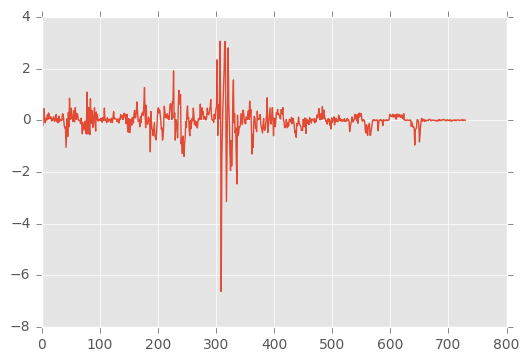

In [5]:
test_stationarity(diff_series(tf_ef_r))

In [6]:
train = tf_ef_r[:723]
test = tf_ef_r[723:]

In [8]:
len(test)

8

### ARIMA

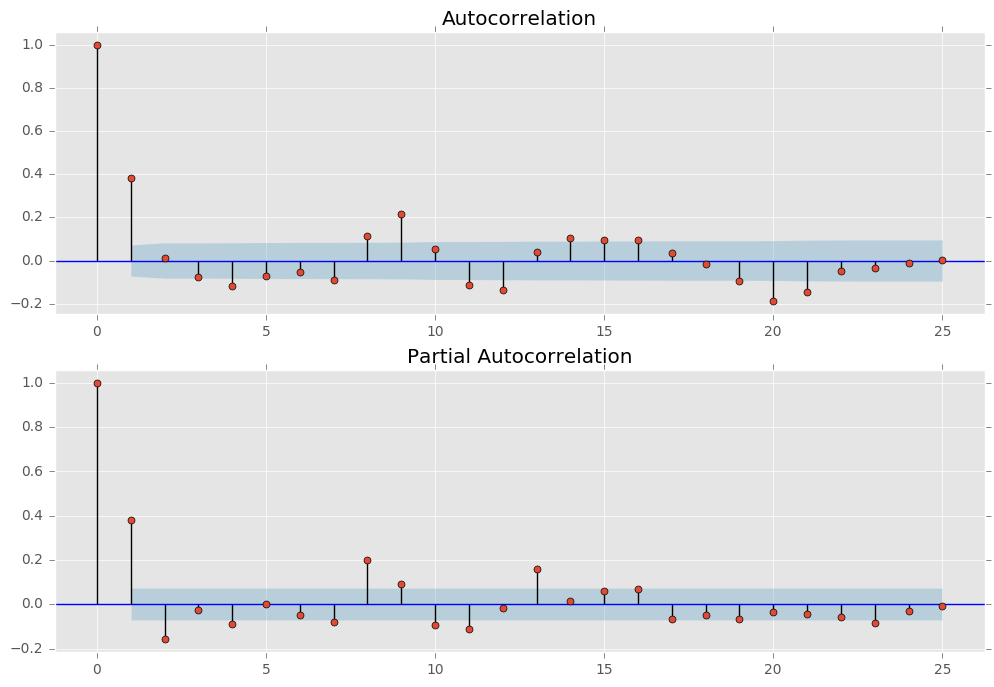

In [9]:
correlogram(diff_series(tf_ef_r))

In [10]:
model = ARIMA(np.array(train), order=(2,1,1)).fit(trend='nc')
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  722
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -482.677
Method:                       css-mle   S.D. of innovations              0.472
Date:                Tue, 09 May 2017   AIC                            973.353
Time:                        02:13:31   BIC                            991.682
Sample:                             1   HQIC                           980.428
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.9107      0.161      5.662      0.000       0.595       1.226
ar.L2.D.y     -0.3278      0.059     -5.600      0.000      -0.443      -0.213
ma.L1.D.y     -0.4868      0.168     -2.905      0.0

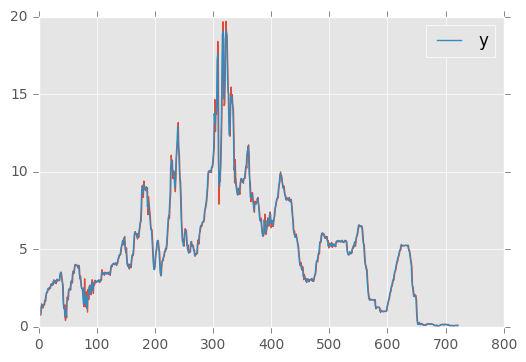

In [11]:
model.plot_predict()
plt.show()

In [10]:
forc_arima = model.forecast(len(test))

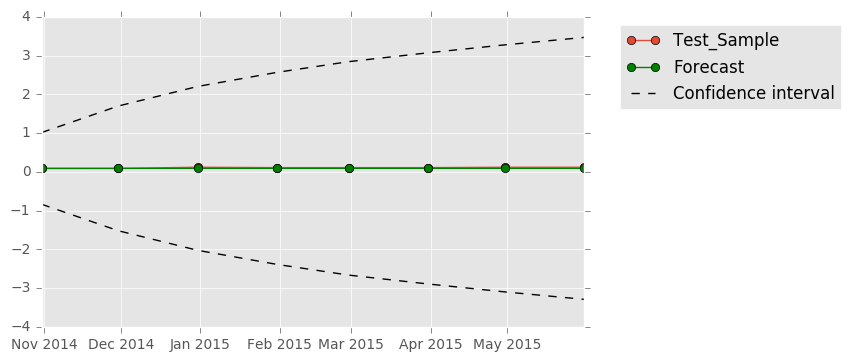

In [45]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.05,1))

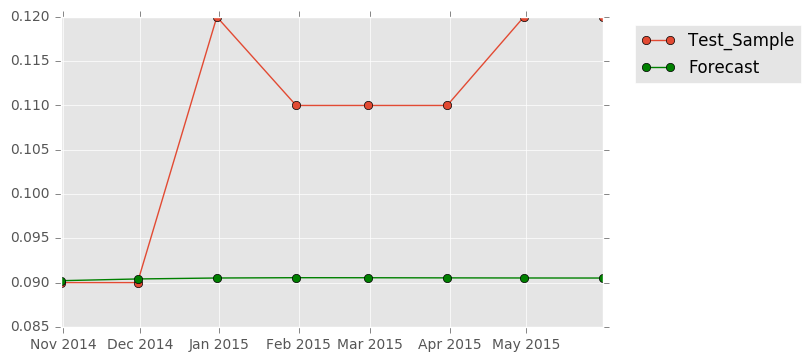

In [44]:
plot_forecast_out_only(test, forc_arima, conf_int=False, bbox_loc=(1.38,1))

In [52]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.018429207085006928, 'MSE': 0.00046788226060878258}

### ANN

In [99]:
train_nn = create_df_for_nn(tf_ef_r, 2).loc[:'2014-09-30', :]

In [110]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [116]:
nn = assemble_model(2)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 19.4075
Epoch 2/100
1s - loss: 12.1255
Epoch 3/100
1s - loss: 10.1788
Epoch 4/100
1s - loss: 8.3927
Epoch 5/100
0s - loss: 6.8455
Epoch 6/100
1s - loss: 6.0549
Epoch 7/100
1s - loss: 5.1777
Epoch 8/100
1s - loss: 5.1723
Epoch 9/100
1s - loss: 4.5537
Epoch 10/100
1s - loss: 4.2062
Epoch 11/100
1s - loss: 4.3369
Epoch 12/100
1s - loss: 4.0420
Epoch 13/100
1s - loss: 3.9262
Epoch 14/100
1s - loss: 4.1562
Epoch 15/100
1s - loss: 3.3575
Epoch 16/100
1s - loss: 3.6048
Epoch 17/100
1s - loss: 3.5404
Epoch 18/100
1s - loss: 3.1063
Epoch 19/100
1s - loss: 3.0886
Epoch 20/100
1s - loss: 2.8435
Epoch 21/100
1s - loss: 2.7652
Epoch 22/100
1s - loss: 2.4132
Epoch 23/100
0s - loss: 2.4437
Epoch 24/100
1s - loss: 2.7325
Epoch 25/100
1s - loss: 2.9185
Epoch 26/100
1s - loss: 2.6597
Epoch 27/100
1s - loss: 2.3331
Epoch 28/100
1s - loss: 2.3543
Epoch 29/100
1s - loss: 2.5066
Epoch 30/100
1s - loss: 2.4350
Epoch 31/100
1s - loss: 2.1496
Epoch 32/100
1s - loss: 2.5558
Epoch 33/100
1

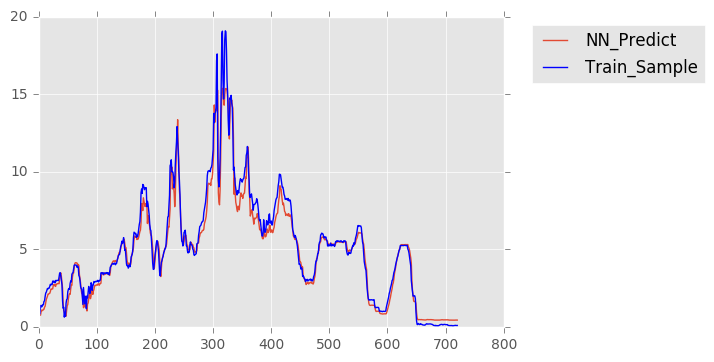

In [117]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [118]:
nn_forecast = nn_predict_series(nn, train_nn.iloc[-1:, 1:], len(test))

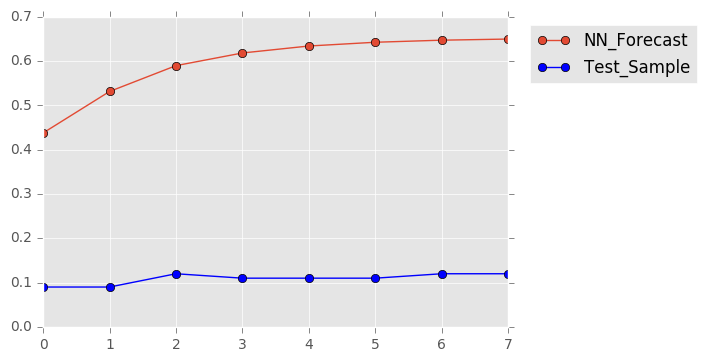

In [119]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.03, 1))

In [120]:
errors_out_sample(test, nn_forecast)

{'MAE': 0.48527491152286528, 'MSE': 0.23912817096244565}

### Hybrid

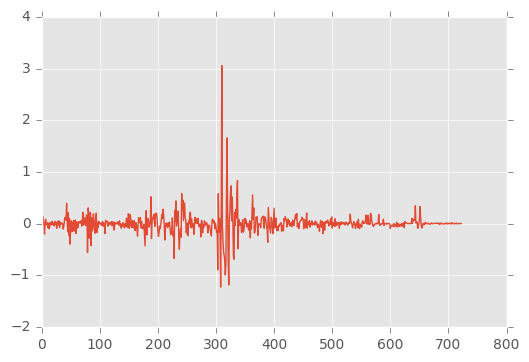

In [62]:
resids_arima = get_resids_arima(train, model)
plt.plot(resids_arima)
plt.show()

In [86]:
lags_nn = 4

df_nn_resid = create_df_for_nn_residuals(resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [87]:
nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.0636
Epoch 2/100
0s - loss: 0.0454
Epoch 3/100
0s - loss: 0.0453
Epoch 4/100
0s - loss: 0.0445
Epoch 5/100
0s - loss: 0.0445
Epoch 6/100
0s - loss: 0.0436
Epoch 7/100
0s - loss: 0.0435
Epoch 8/100
0s - loss: 0.0433
Epoch 9/100
0s - loss: 0.0428
Epoch 10/100
0s - loss: 0.0429
Epoch 11/100
0s - loss: 0.0424
Epoch 12/100
0s - loss: 0.0426
Epoch 13/100
0s - loss: 0.0424
Epoch 14/100
0s - loss: 0.0427
Epoch 15/100
0s - loss: 0.0432
Epoch 16/100
0s - loss: 0.0425
Epoch 17/100
0s - loss: 0.0424
Epoch 18/100
0s - loss: 0.0426
Epoch 19/100
0s - loss: 0.0419
Epoch 20/100
0s - loss: 0.0429
Epoch 21/100
0s - loss: 0.0423
Epoch 22/100
0s - loss: 0.0422
Epoch 23/100
0s - loss: 0.0424
Epoch 24/100
0s - loss: 0.0423
Epoch 25/100
0s - loss: 0.0424
Epoch 26/100
0s - loss: 0.0420
Epoch 27/100
0s - loss: 0.0423
Epoch 28/100
0s - loss: 0.0423
Epoch 29/100
0s - loss: 0.0420
Epoch 30/100
0s - loss: 0.0421
Epoch 31/100
0s - loss: 0.0424
Epoch 32/100
0s - loss: 0.0419
Epoch 33/100
0s -

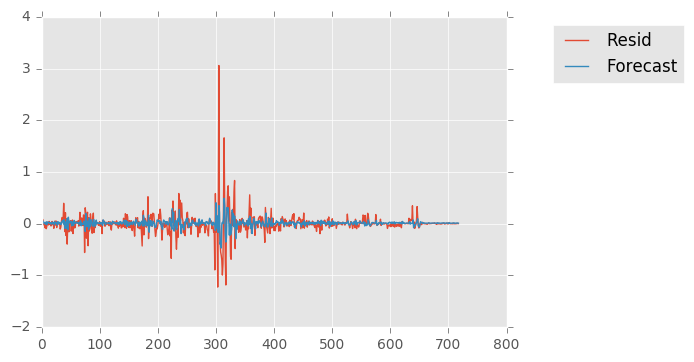

In [88]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.4,1), loc='best')
plt.show()

In [89]:
nn_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

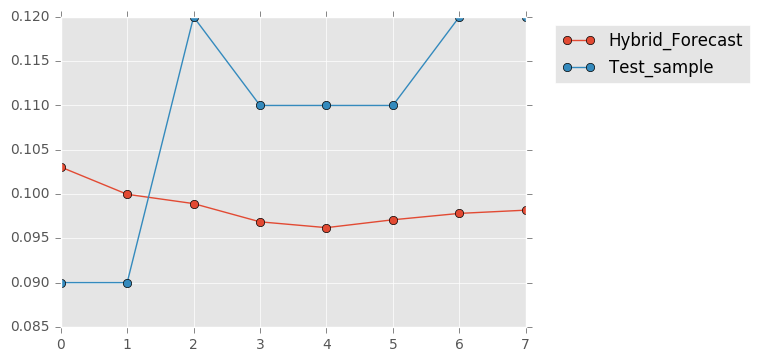

In [103]:
hybrid_plot_forecast(forc_arima, nn_resid_forecast, test)

In [99]:
hybrid_forecast = hybrid_predict_series(forc_arima, nn_resid_forecast)

In [102]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 0.015993612753533816, 'MSE': 0.00027650315728638974}

---

---

---

# RU Real GDP Pure

In [12]:
ru_gdp = df.iloc[11, 1:87].copy()
ru_gdp.index = pd.DatetimeIndex(start='1995-01', end='2016-07', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                 -0.775266
p-value                         0.826280
#Lags Used                      1.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (10%)           -2.585482
Critical Value (5%)            -2.896616
dtype: float64


Results of KPSS Test:
Test Statistic            0.724840
p-value                   0.011287
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


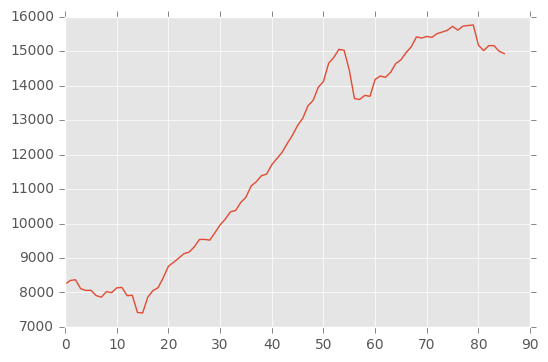

In [13]:
test_stationarity(ru_gdp)

Results of Dickey-Fuller Test:
Test Statistic                -5.828238e+00
p-value                        4.031817e-07
#Lags Used                     0.000000e+00
Number of Observations Used    8.400000e+01
Critical Value (1%)           -3.510712e+00
Critical Value (10%)          -2.585482e+00
Critical Value (5%)           -2.896616e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.168208
p-value                   0.100000
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


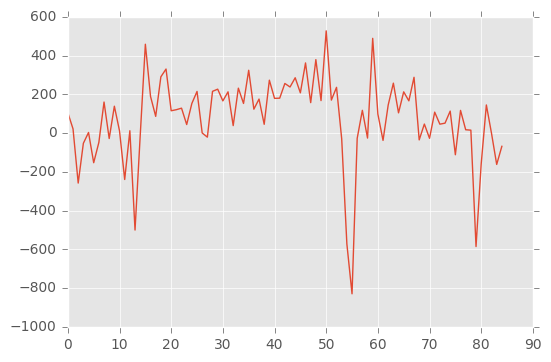

In [14]:
test_stationarity(diff_series(ru_gdp))

In [15]:
train = ru_gdp[:-8]
test = ru_gdp[-8:]

### ARIMA

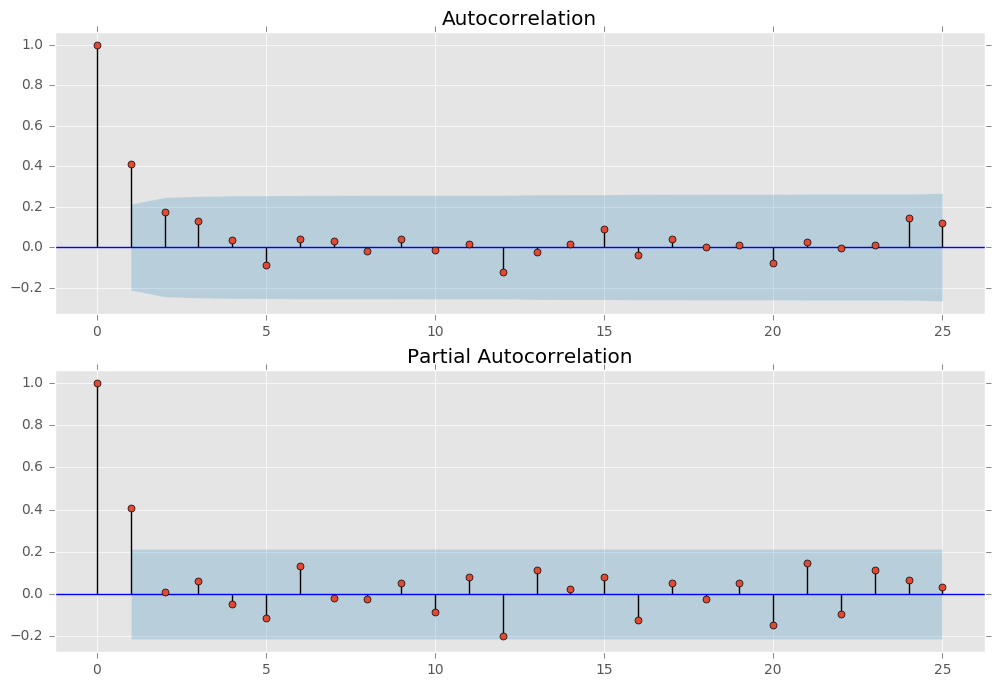

In [16]:
correlogram(diff_series(ru_gdp))

In [17]:
arima_model = ARIMA(np.array(train), order=(2,1,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   77
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -513.063
Method:                       css-mle   S.D. of innovations            187.560
Date:                Tue, 09 May 2017   AIC                           1036.125
Time:                        02:14:00   BIC                           1047.844
Sample:                             1   HQIC                          1040.813
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.2694     16.396      6.664      0.000      77.134     141.404
ar.L1.D.y      1.3800      0.101     13.603      0.000       1.181       1.579
ar.L2.D.y     -0.4231      0.104     -4.072      0.0

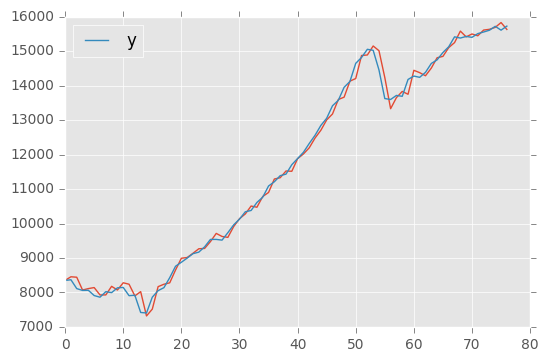

In [18]:
arima_model.plot_predict()
plt.show()

In [19]:
forc_arima = arima_model.forecast(len(test))

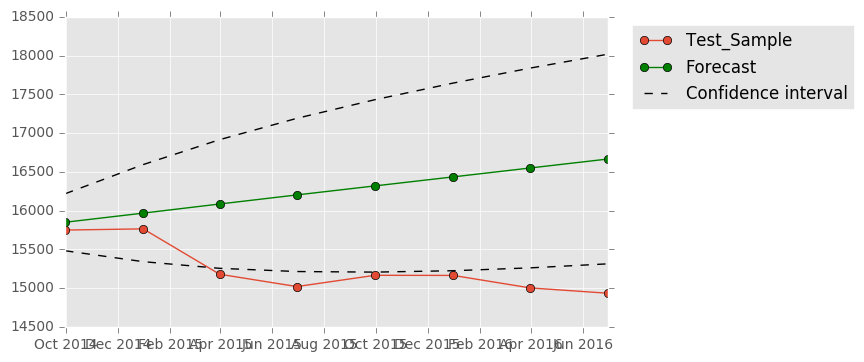

In [20]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

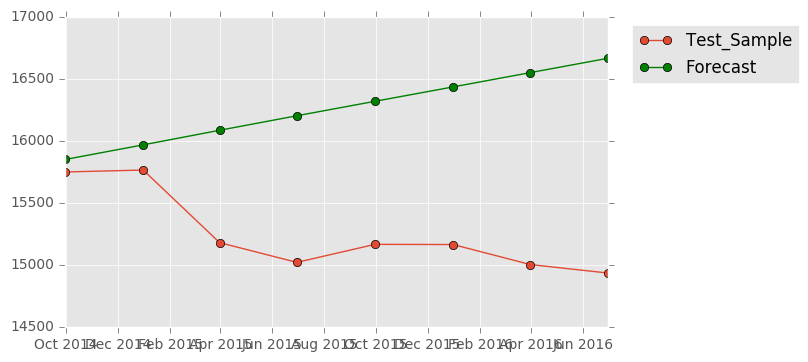

In [21]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1), conf_int=False)

In [22]:
errors_out_sample(test, forc_arima[0])

{'MAE': 1012.0765282381089,
 'MSE': 1326385.7837351069,
 'RMSE': 1151.6882320033956}

### ANN

In [23]:
mean = train.mean()
z = train.max() - train.min()
scaled_train = train.copy()

In [24]:
scaled_train = (scaled_train-mean)/z

In [25]:
lags_for_nn = 2

In [26]:
train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [27]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [37]:
nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=150, 
       verbose=2,
       batch_size=1)

Epoch 1/150
0s - loss: 0.1717
Epoch 2/150
0s - loss: 0.1160
Epoch 3/150
0s - loss: 0.1148
Epoch 4/150
0s - loss: 0.1174
Epoch 5/150
0s - loss: 0.1145
Epoch 6/150
0s - loss: 0.1096
Epoch 7/150
0s - loss: 0.1046
Epoch 8/150
0s - loss: 0.1021
Epoch 9/150
0s - loss: 0.0960
Epoch 10/150
0s - loss: 0.0880
Epoch 11/150
0s - loss: 0.0812
Epoch 12/150
0s - loss: 0.0736
Epoch 13/150
0s - loss: 0.0615
Epoch 14/150
0s - loss: 0.0497
Epoch 15/150
0s - loss: 0.0379
Epoch 16/150
0s - loss: 0.0261
Epoch 17/150
0s - loss: 0.0179
Epoch 18/150
0s - loss: 0.0108
Epoch 19/150
0s - loss: 0.0068
Epoch 20/150
0s - loss: 0.0043
Epoch 21/150
0s - loss: 0.0032
Epoch 22/150
0s - loss: 0.0027
Epoch 23/150
0s - loss: 0.0024
Epoch 24/150
0s - loss: 0.0023
Epoch 25/150
0s - loss: 0.0022
Epoch 26/150
0s - loss: 0.0022
Epoch 27/150
0s - loss: 0.0021
Epoch 28/150
0s - loss: 0.0021
Epoch 29/150
0s - loss: 0.0020
Epoch 30/150
0s - loss: 0.0020
Epoch 31/150
0s - loss: 0.0019
Epoch 32/150
0s - loss: 0.0019
Epoch 33/150
0s -

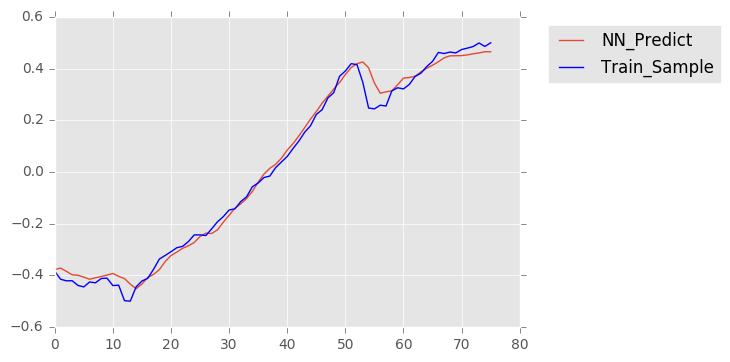

In [29]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

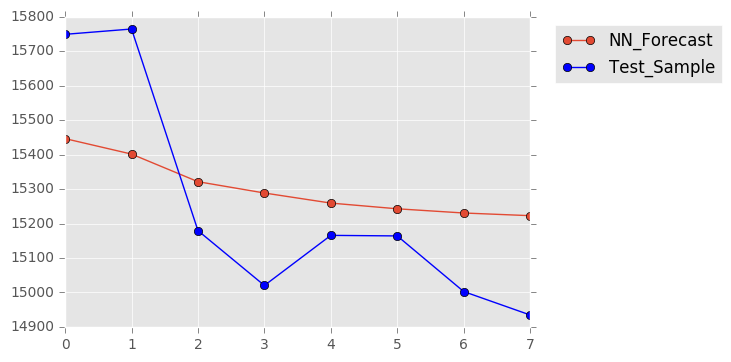

In [31]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

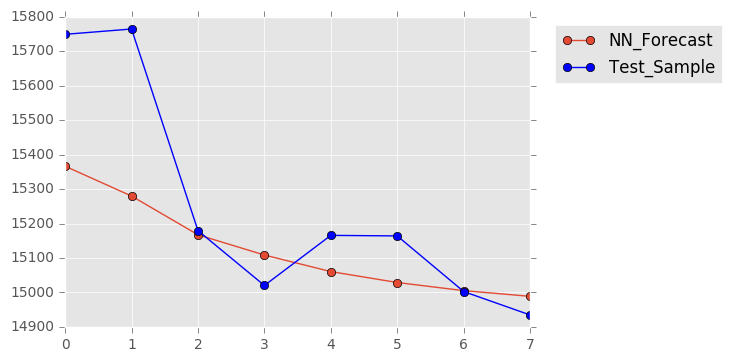

In [34]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

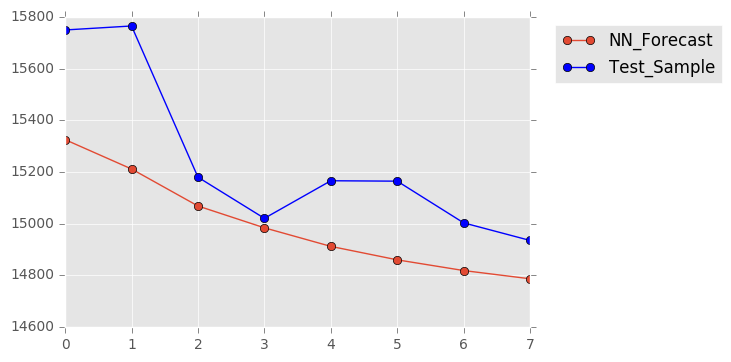

In [36]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

#### WIth Dropout

In [39]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [40]:
nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=150, 
       verbose=2,
       batch_size=1)

Epoch 1/150
0s - loss: 0.9629
Epoch 2/150
0s - loss: 0.3535
Epoch 3/150
0s - loss: 0.1511
Epoch 4/150
0s - loss: 0.1320
Epoch 5/150
0s - loss: 0.1358
Epoch 6/150
0s - loss: 0.1187
Epoch 7/150
0s - loss: 0.1227
Epoch 8/150
0s - loss: 0.1239
Epoch 9/150
0s - loss: 0.1309
Epoch 10/150
0s - loss: 0.1146
Epoch 11/150
0s - loss: 0.1094
Epoch 12/150
0s - loss: 0.1093
Epoch 13/150
0s - loss: 0.1129
Epoch 14/150
0s - loss: 0.1187
Epoch 15/150
0s - loss: 0.1088
Epoch 16/150
0s - loss: 0.1164
Epoch 17/150
0s - loss: 0.1198
Epoch 18/150
0s - loss: 0.1133
Epoch 19/150
0s - loss: 0.1126
Epoch 20/150
0s - loss: 0.1105
Epoch 21/150
0s - loss: 0.1124
Epoch 22/150
0s - loss: 0.1159
Epoch 23/150
0s - loss: 0.1069
Epoch 24/150
0s - loss: 0.1156
Epoch 25/150
0s - loss: 0.1053
Epoch 26/150
0s - loss: 0.1142
Epoch 27/150
0s - loss: 0.1095
Epoch 28/150
0s - loss: 0.1060
Epoch 29/150
0s - loss: 0.1106
Epoch 30/150
0s - loss: 0.1040
Epoch 31/150
0s - loss: 0.0911
Epoch 32/150
0s - loss: 0.1027
Epoch 33/150
0s -

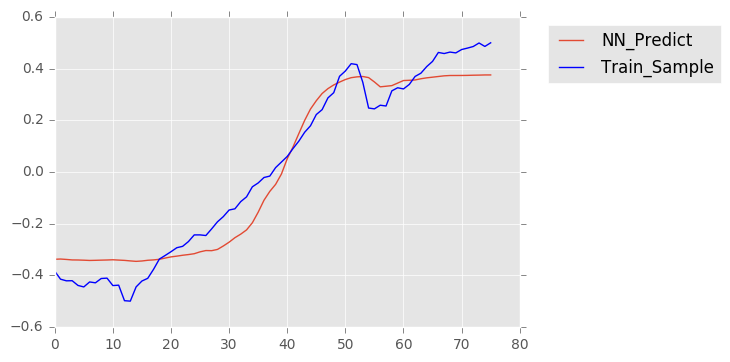

In [41]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [43]:
nn_forecast = np.array(nn_predict_series(nn, pd.DataFrame(train_nn.iloc[len(train_nn)-1, 1:]).T, 
                                         len(test)))*z + mean

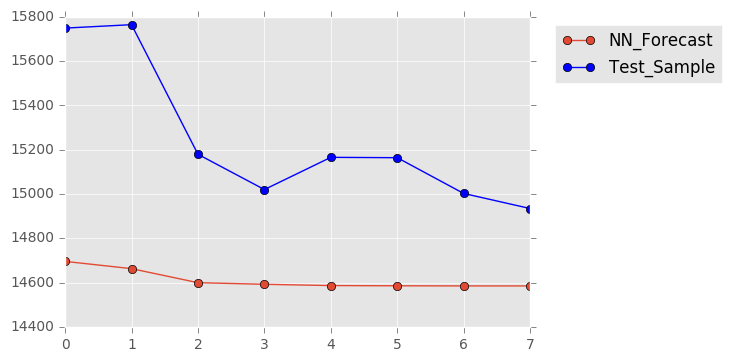

In [44]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [45]:
errors_out_sample(test, nn_forecast)

{'MAE': 636.00044453260011,
 'MSE': 476251.44625874661,
 'RMSE': 690.1097349398475}

### Hybrid

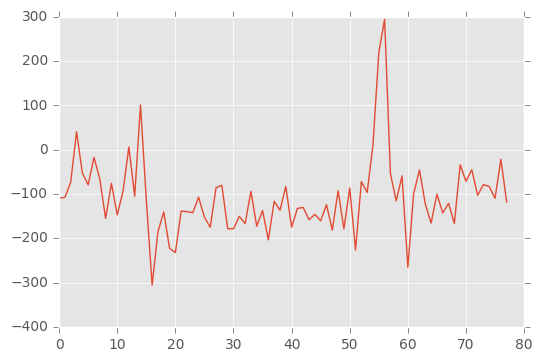

In [46]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [47]:
scaled_resids_arima = scaler(resids_arima)[0]

In [48]:
lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [49]:
nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0497
Epoch 2/100
0s - loss: 0.0228
Epoch 3/100
0s - loss: 0.0231
Epoch 4/100
0s - loss: 0.0231
Epoch 5/100
0s - loss: 0.0231
Epoch 6/100
0s - loss: 0.0236
Epoch 7/100
0s - loss: 0.0228
Epoch 8/100
0s - loss: 0.0229
Epoch 9/100
0s - loss: 0.0228
Epoch 10/100
0s - loss: 0.0229
Epoch 11/100
0s - loss: 0.0225
Epoch 12/100
0s - loss: 0.0227
Epoch 13/100
0s - loss: 0.0225
Epoch 14/100
0s - loss: 0.0235
Epoch 15/100
0s - loss: 0.0236
Epoch 16/100
0s - loss: 0.0231
Epoch 17/100
0s - loss: 0.0232
Epoch 18/100
0s - loss: 0.0233
Epoch 19/100
0s - loss: 0.0230
Epoch 20/100
0s - loss: 0.0229
Epoch 21/100
0s - loss: 0.0240
Epoch 22/100
0s - loss: 0.0225
Epoch 23/100
0s - loss: 0.0209
Epoch 24/100
0s - loss: 0.0244
Epoch 25/100
0s - loss: 0.0221
Epoch 26/100
0s - loss: 0.0223
Epoch 27/100
0s - loss: 0.0228
Epoch 28/100
0s - loss: 0.0227
Epoch 29/100
0s - loss: 0.0224
Epoch 30/100
0s - loss: 0.0222
Epoch 31/100
0s - loss: 0.0238
Epoch 32/100
0s - loss: 0.0222
Epoch 33/100
0s -

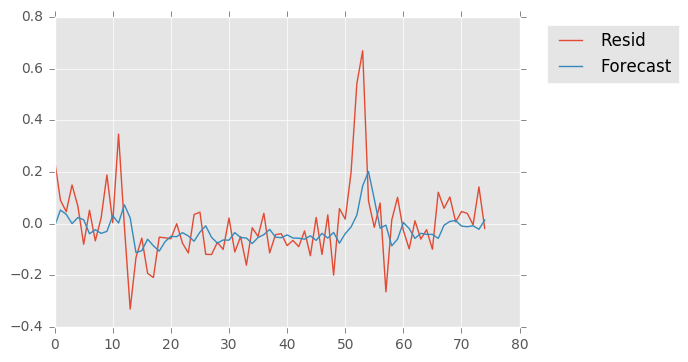

In [50]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [51]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

In [52]:
nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

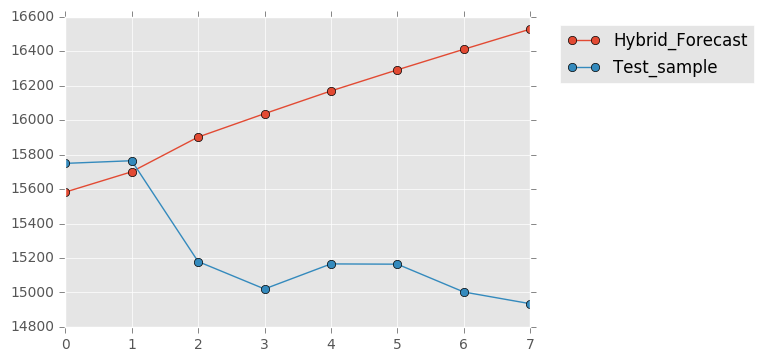

In [53]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [54]:
hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

In [55]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 888.50603747301102,
 'MSE': 1050085.5579509814,
 'RMSE': 1024.7368237508504}

In [56]:
nn_resids_forecast

array([-267.39276123, -267.39276123, -183.43624878, -164.70655823,
       -149.27124023, -142.66702271, -138.75643921, -136.77049255], dtype=float32)

---

---

---

# RU Export Pure

In [57]:
ru_exp = df.iloc[13, 1:87].copy()
ru_exp.index = pd.DatetimeIndex(start='1995-01', end='2016-07', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                 -0.903524
p-value                         0.786810
#Lags Used                      2.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (10%)           -2.585713
Critical Value (5%)            -2.897048
dtype: float64


Results of KPSS Test:
Test Statistic            0.738559
p-value                   0.010040
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


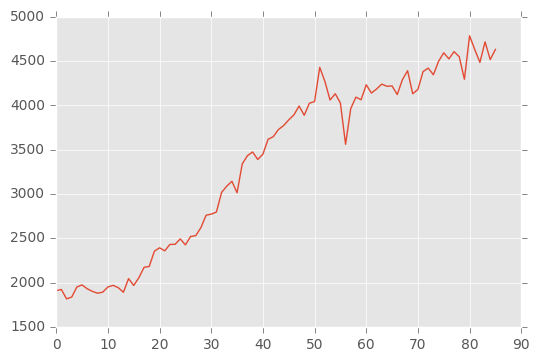

In [58]:
test_stationarity(ru_exp)

Results of Dickey-Fuller Test:
Test Statistic                -1.024904e+01
p-value                        4.536603e-18
#Lags Used                     1.000000e+00
Number of Observations Used    8.300000e+01
Critical Value (1%)           -3.511712e+00
Critical Value (10%)          -2.585713e+00
Critical Value (5%)           -2.897048e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.153264
p-value                   0.100000
#Lags Used               12.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


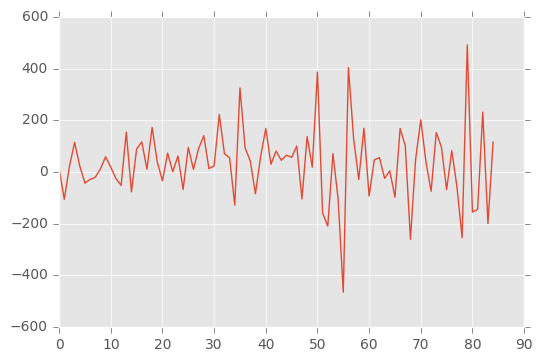

In [59]:
test_stationarity(diff_series(ru_exp))

In [61]:
train = ru_exp[:-8]
test = ru_exp[-8:]

### ARIMA

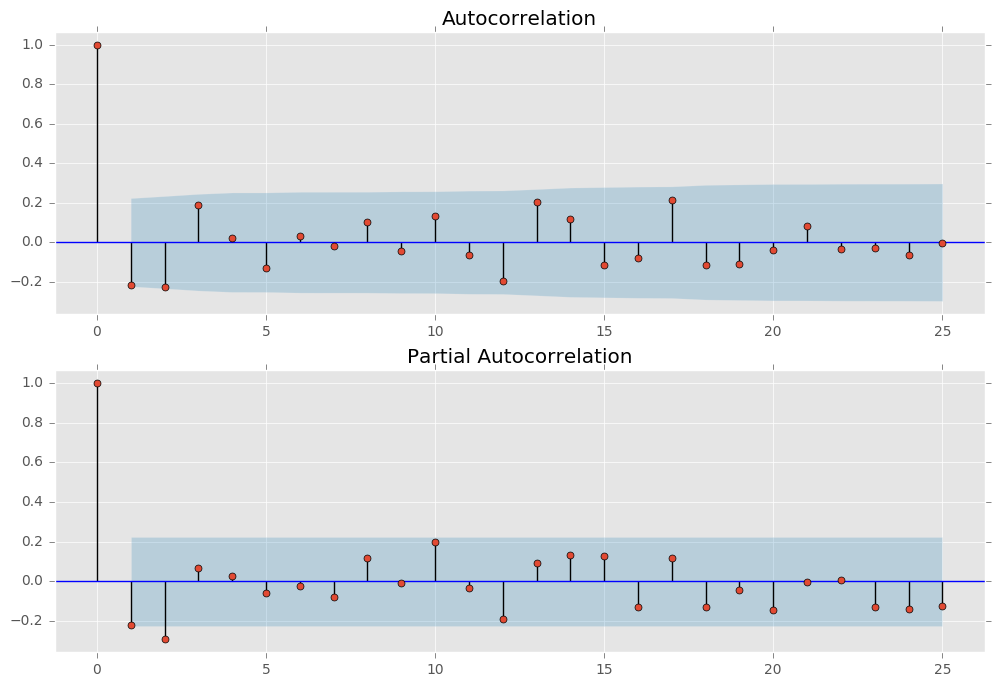

In [62]:
correlogram(diff_series(train))

In [63]:
arima_model = ARIMA(np.array(train), order=(0,1,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   77
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -479.211
Method:                       css-mle   S.D. of innovations            121.972
Date:                Tue, 09 May 2017   AIC                            964.421
Time:                        02:20:08   BIC                            971.453
Sample:                             1   HQIC                           967.234
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2563      9.260      3.807      0.000      17.107      53.406
ma.L1.D.y     -0.3383      0.116     -2.909      0.005      -0.566      -0.110
                                    Roots           

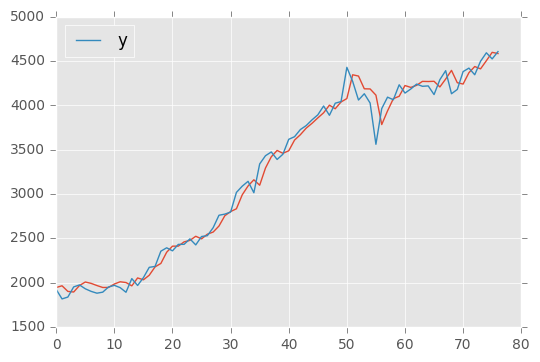

In [64]:
arima_model.plot_predict()
plt.show()

In [65]:
forc_arima = arima_model.forecast(len(test))

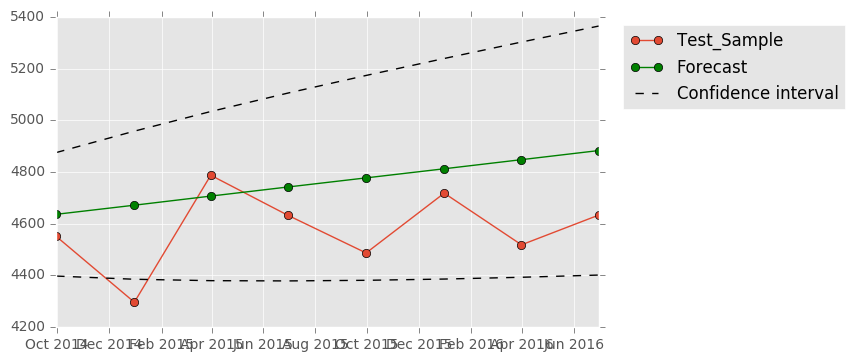

In [66]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [67]:
errors_out_sample(test, forc_arima[0])

{'MAE': 201.98485170320669,
 'MSE': 53915.595663410102,
 'RMSE': 232.19732053451887}

### ANN

In [68]:
scaled_train = scaler(train)[0]

In [69]:
lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [91]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [92]:
nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1767
Epoch 2/100
0s - loss: 0.1679
Epoch 3/100
0s - loss: 0.1349
Epoch 4/100
0s - loss: 0.1480
Epoch 5/100
0s - loss: 0.1222
Epoch 6/100
0s - loss: 0.1244
Epoch 7/100
0s - loss: 0.1349
Epoch 8/100
0s - loss: 0.1309
Epoch 9/100
0s - loss: 0.1245
Epoch 10/100
0s - loss: 0.1234
Epoch 11/100
0s - loss: 0.1095
Epoch 12/100
0s - loss: 0.1063
Epoch 13/100
0s - loss: 0.1091
Epoch 14/100
0s - loss: 0.0938
Epoch 15/100
0s - loss: 0.1060
Epoch 16/100
0s - loss: 0.0918
Epoch 17/100
0s - loss: 0.0878
Epoch 18/100
0s - loss: 0.0812
Epoch 19/100
0s - loss: 0.0942
Epoch 20/100
0s - loss: 0.0897
Epoch 21/100
0s - loss: 0.0844
Epoch 22/100
0s - loss: 0.0813
Epoch 23/100
0s - loss: 0.0689
Epoch 24/100
0s - loss: 0.0644
Epoch 25/100
0s - loss: 0.0777
Epoch 26/100
0s - loss: 0.0705
Epoch 27/100
0s - loss: 0.0716
Epoch 28/100
0s - loss: 0.0628
Epoch 29/100
0s - loss: 0.0560
Epoch 30/100
0s - loss: 0.0610
Epoch 31/100
0s - loss: 0.0568
Epoch 32/100
0s - loss: 0.0774
Epoch 33/100
0s -

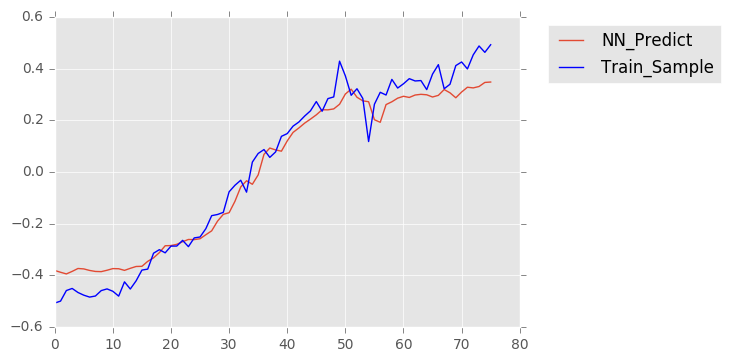

In [93]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [94]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

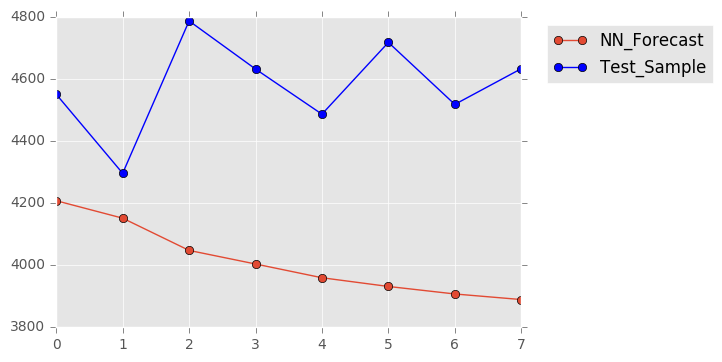

In [95]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [96]:
errors_out_sample(test, nn_forecast)

{'MAE': 566.04512235739821,
 'MSE': 363626.6965548193,
 'RMSE': 603.0146735816794}

### Hybrid

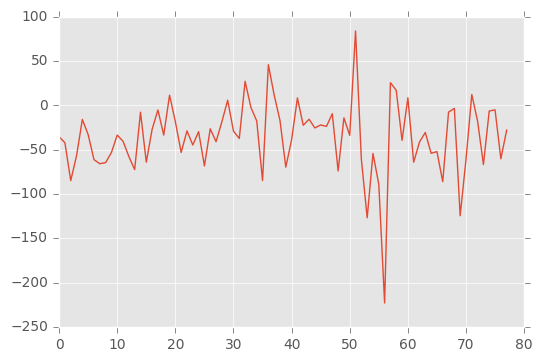

In [97]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [98]:
scaled_resids_arima = scaler(resids_arima)[0]

In [99]:
lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

In [100]:
nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0408
Epoch 2/100
0s - loss: 0.0189
Epoch 3/100
0s - loss: 0.0190
Epoch 4/100
0s - loss: 0.0188
Epoch 5/100
0s - loss: 0.0188
Epoch 6/100
0s - loss: 0.0193
Epoch 7/100
0s - loss: 0.0187
Epoch 8/100
0s - loss: 0.0188
Epoch 9/100
0s - loss: 0.0193
Epoch 10/100
0s - loss: 0.0196
Epoch 11/100
0s - loss: 0.0185
Epoch 12/100
0s - loss: 0.0197
Epoch 13/100
0s - loss: 0.0187
Epoch 14/100
0s - loss: 0.0185
Epoch 15/100
0s - loss: 0.0191
Epoch 16/100
0s - loss: 0.0191
Epoch 17/100
0s - loss: 0.0191
Epoch 18/100
0s - loss: 0.0189
Epoch 19/100
0s - loss: 0.0185
Epoch 20/100
0s - loss: 0.0189
Epoch 21/100
0s - loss: 0.0189
Epoch 22/100
0s - loss: 0.0187
Epoch 23/100
0s - loss: 0.0184
Epoch 24/100
0s - loss: 0.0188
Epoch 25/100
0s - loss: 0.0188
Epoch 26/100
0s - loss: 0.0180
Epoch 27/100
0s - loss: 0.0185
Epoch 28/100
0s - loss: 0.0184
Epoch 29/100
0s - loss: 0.0194
Epoch 30/100
0s - loss: 0.0190
Epoch 31/100
0s - loss: 0.0182
Epoch 32/100
0s - loss: 0.0186
Epoch 33/100
0s -

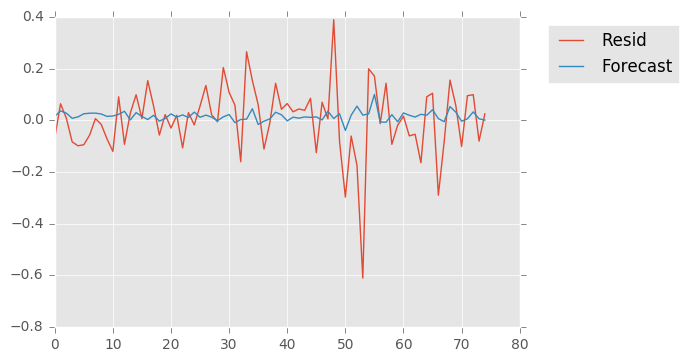

In [101]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [102]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

In [103]:
nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

In [104]:
hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

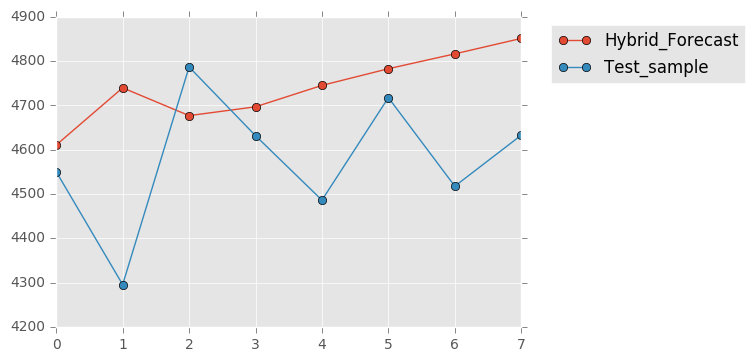

In [105]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [106]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 190.20425210909048,
 'MSE': 53234.304209238515,
 'RMSE': 230.72560371410563}

---

---

---

# Government consumption expenditures and gross investment

In [107]:
gov_consump_inv = df.iloc[32, 1:186].copy()
gov_consump_inv.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   0.619421
p-value                          0.988085
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (10%)            -2.575917
Critical Value (5%)             -2.878696
dtype: float64


Results of KPSS Test:
Test Statistic            1.281905
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


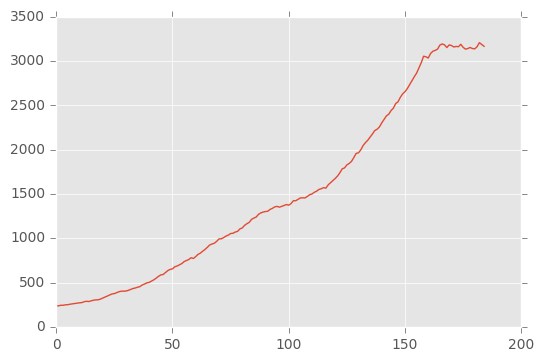

In [108]:
test_stationarity(gov_consump_inv)

Results of Dickey-Fuller Test:
Test Statistic                  -2.785001
p-value                          0.060448
#Lags Used                      13.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (10%)            -2.575917
Critical Value (5%)             -2.878696
dtype: float64


Results of KPSS Test:
Test Statistic            0.335988
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


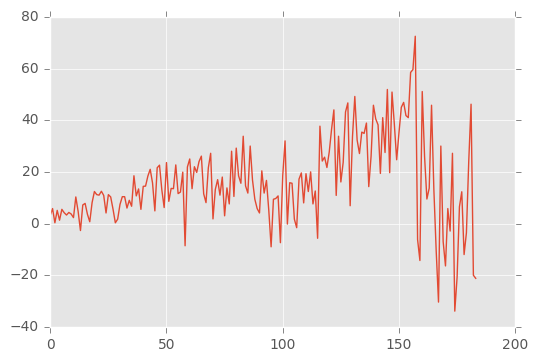

In [109]:
test_stationarity(diff_series(gov_consump_inv))

Results of Dickey-Fuller Test:
Test Statistic                -8.139737e+00
p-value                        1.035898e-12
#Lags Used                     6.000000e+00
Number of Observations Used    1.760000e+02
Critical Value (1%)           -3.468062e+00
Critical Value (10%)          -2.575602e+00
Critical Value (5%)           -2.878106e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.164808
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


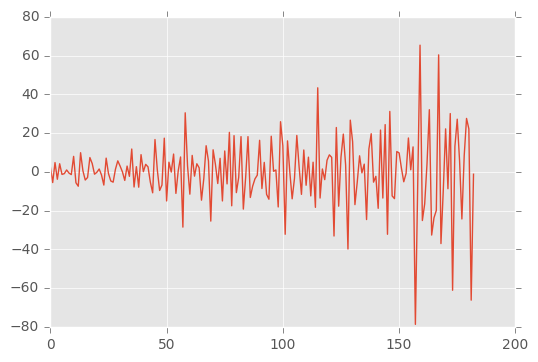

In [110]:
test_stationarity(diff_series(diff_series(gov_consump_inv)))

In [112]:
train = gov_consump_inv[:-8]
test = gov_consump_inv[-8:]

### ARIMA

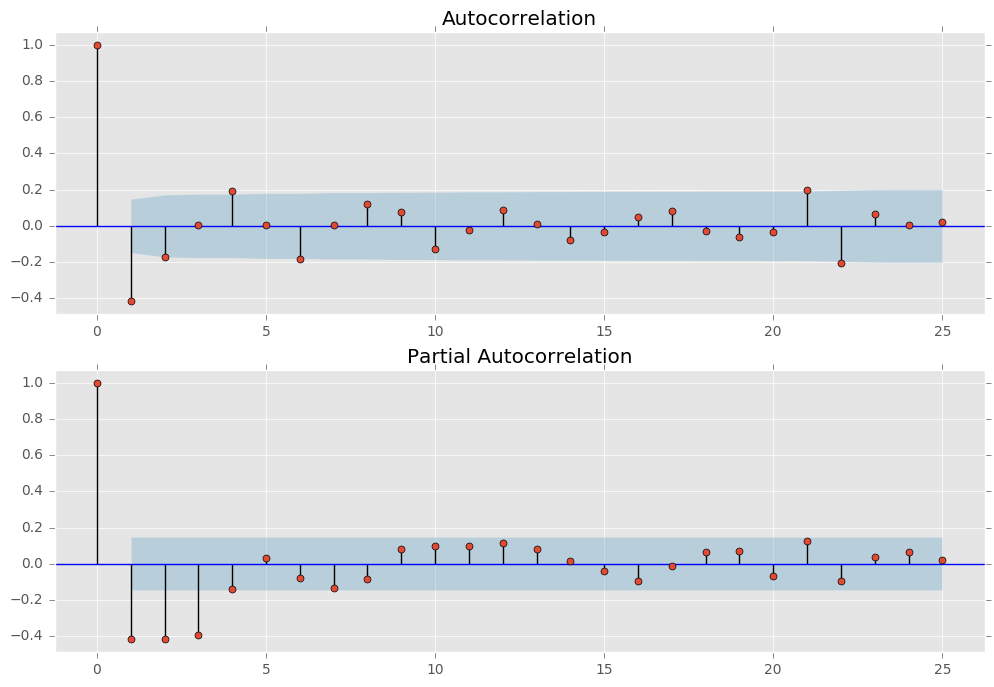

In [113]:
correlogram(diff_series(diff_series(train)))

In [114]:
arima_model = ARIMA(np.array(train), order=(1,2,3)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  175
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -696.664
Method:                       css-mle   S.D. of innovations             12.912
Date:                Tue, 09 May 2017   AIC                           1403.328
Time:                        02:25:10   BIC                           1419.152
Sample:                             2   HQIC                          1409.747
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y     0.3271      0.227      1.440      0.152      -0.118       0.772
ma.L1.D2.y    -1.1757      0.220     -5.343      0.000      -1.607      -0.744
ma.L2.D2.y     0.1525      0.228      0.670      0.5

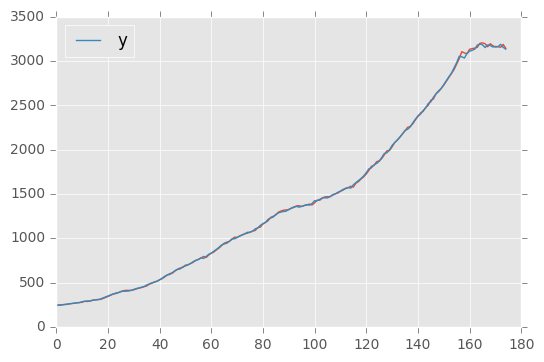

In [115]:
arima_model.plot_predict()
plt.show()

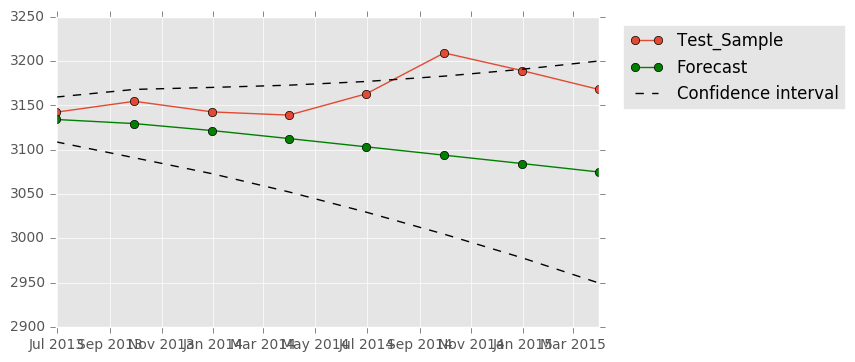

In [116]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [117]:
errors_out_sample(test, forc_arima[0])

{'MAE': 56.781083511089037,
 'MSE': 4804.4816014402959,
 'RMSE': 69.314367929313875}

### ANN

#### First launch

In [118]:
scaled_train = scaler(train)[0]

In [119]:
lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [120]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    #model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0892
Epoch 2/100
0s - loss: 0.0712
Epoch 3/100
0s - loss: 0.0534
Epoch 4/100
0s - loss: 0.0359
Epoch 5/100
0s - loss: 0.0204
Epoch 6/100
0s - loss: 0.0091
Epoch 7/100
0s - loss: 0.0032
Epoch 8/100
0s - loss: 8.8751e-04
Epoch 9/100
0s - loss: 2.6836e-04
Epoch 10/100
0s - loss: 1.3650e-04
Epoch 11/100
0s - loss: 1.2089e-04
Epoch 12/100
0s - loss: 1.1933e-04
Epoch 13/100
0s - loss: 1.1632e-04
Epoch 14/100
0s - loss: 1.1630e-04
Epoch 15/100
0s - loss: 1.1436e-04
Epoch 16/100
0s - loss: 1.1572e-04
Epoch 17/100
0s - loss: 1.2394e-04
Epoch 18/100
0s - loss: 1.1307e-04
Epoch 19/100
0s - loss: 1.1646e-04
Epoch 20/100
0s - loss: 1.0986e-04
Epoch 21/100
0s - loss: 1.1554e-04
Epoch 22/100
0s - loss: 1.0178e-04
Epoch 23/100
0s - loss: 1.1197e-04
Epoch 24/100
0s - loss: 1.0858e-04
Epoch 25/100
0s - loss: 1.0591e-04
Epoch 26/100
0s - loss: 1.0596e-04
Epoch 27/100
0s - loss: 1.1946e-04
Epoch 28/100
0s - loss: 1.1629e-04
Epoch 29/100
0s - loss: 1.1816e-04
Epoch 30/100
0s - loss

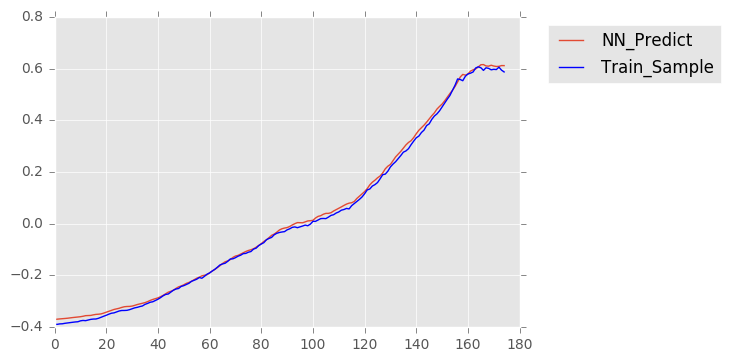

In [121]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [122]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

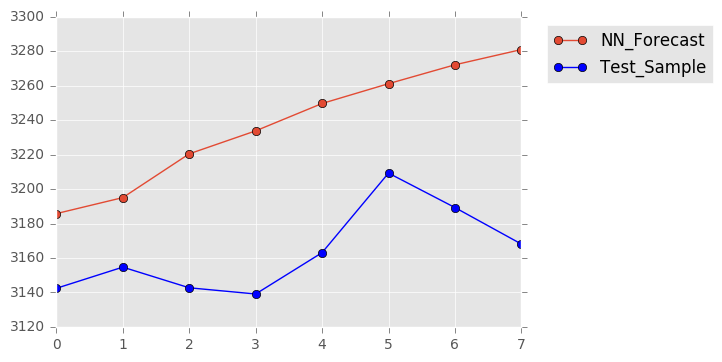

In [123]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [124]:
errors_out_sample(test, nn_forecast)

{'MAE': 73.824578857421898,
 'MSE': 6044.2890825673985,
 'RMSE': 77.745026095354802}

#### Second launch

In [125]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    #model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

Epoch 1/100
0s - loss: 0.1238
Epoch 2/100
0s - loss: 0.0851
Epoch 3/100
0s - loss: 0.0717
Epoch 4/100
0s - loss: 0.0583
Epoch 5/100
0s - loss: 0.0396
Epoch 6/100
0s - loss: 0.0226
Epoch 7/100
0s - loss: 0.0099
Epoch 8/100
0s - loss: 0.0032
Epoch 9/100
0s - loss: 8.2053e-04
Epoch 10/100
0s - loss: 2.2089e-04
Epoch 11/100
0s - loss: 1.2390e-04
Epoch 12/100
0s - loss: 1.0853e-04
Epoch 13/100
0s - loss: 1.0840e-04
Epoch 14/100
0s - loss: 1.0697e-04
Epoch 15/100
0s - loss: 1.0700e-04
Epoch 16/100
0s - loss: 1.1400e-04
Epoch 17/100
0s - loss: 1.0914e-04
Epoch 18/100
0s - loss: 1.1336e-04
Epoch 19/100
0s - loss: 1.1311e-04
Epoch 20/100
0s - loss: 1.0940e-04
Epoch 21/100
0s - loss: 1.1705e-04
Epoch 22/100
0s - loss: 1.2052e-04
Epoch 23/100
0s - loss: 1.1539e-04
Epoch 24/100
0s - loss: 1.1707e-04
Epoch 25/100
0s - loss: 1.1220e-04
Epoch 26/100
0s - loss: 1.1951e-04
Epoch 27/100
0s - loss: 1.1883e-04
Epoch 28/100
0s - loss: 1.0878e-04
Epoch 29/100
0s - loss: 1.1131e-04
Epoch 30/100
0s - loss: 1.

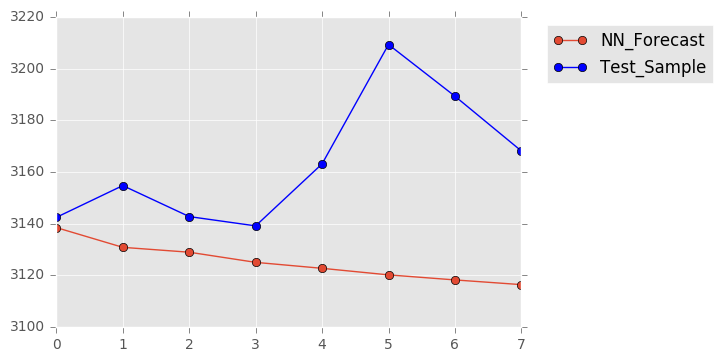

In [126]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [127]:
errors_out_sample(test, nn_forecast)

{'MAE': 38.529760742187477,
 'MSE': 2287.1782884806425,
 'RMSE': 47.824452829913724}

#### Third launch (anouther NN)

In [128]:
lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [129]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

Epoch 1/100
0s - loss: 0.6594
Epoch 2/100
0s - loss: 0.4088
Epoch 3/100
0s - loss: 0.2467
Epoch 4/100
0s - loss: 0.1940
Epoch 5/100
0s - loss: 0.1824
Epoch 6/100
0s - loss: 0.1745
Epoch 7/100
0s - loss: 0.1473
Epoch 8/100
0s - loss: 0.1372
Epoch 9/100
0s - loss: 0.1253
Epoch 10/100
0s - loss: 0.1077
Epoch 11/100
0s - loss: 0.1249
Epoch 12/100
0s - loss: 0.1081
Epoch 13/100
0s - loss: 0.1042
Epoch 14/100
0s - loss: 0.1186
Epoch 15/100
0s - loss: 0.1068
Epoch 16/100
0s - loss: 0.0985
Epoch 17/100
0s - loss: 0.0920
Epoch 18/100
0s - loss: 0.1051
Epoch 19/100
0s - loss: 0.0991
Epoch 20/100
0s - loss: 0.0908
Epoch 21/100
0s - loss: 0.0883
Epoch 22/100
0s - loss: 0.0825
Epoch 23/100
0s - loss: 0.0850
Epoch 24/100
0s - loss: 0.0754
Epoch 25/100
0s - loss: 0.0687
Epoch 26/100
0s - loss: 0.0556
Epoch 27/100
0s - loss: 0.0570
Epoch 28/100
0s - loss: 0.0501
Epoch 29/100
0s - loss: 0.0375
Epoch 30/100
0s - loss: 0.0332
Epoch 31/100
0s - loss: 0.0333
Epoch 32/100
0s - loss: 0.0327
Epoch 33/100
0s -

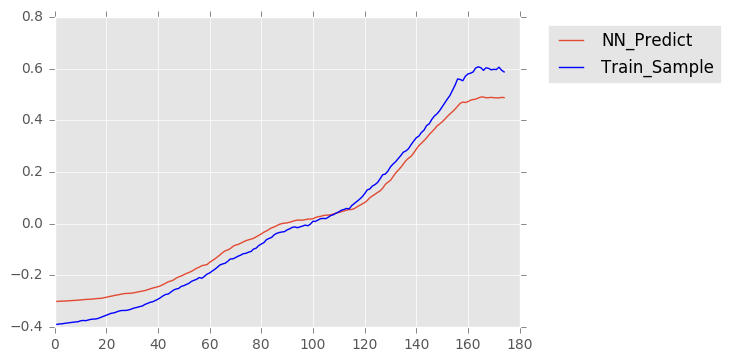

In [130]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

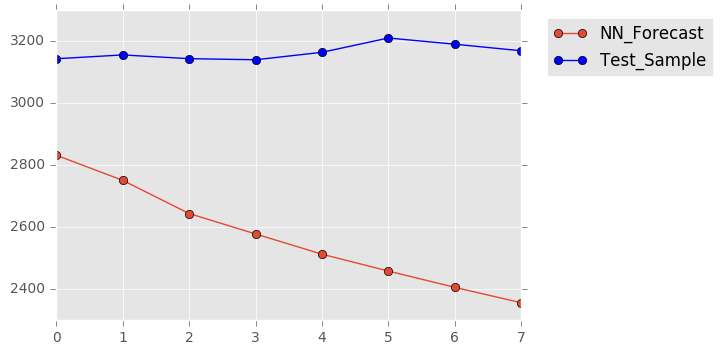

In [131]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [132]:
errors_out_sample(test, nn_forecast)

{'MAE': 597.12869873046873,
 'MSE': 386315.3545127213,
 'RMSE': 621.54272138986653}

### Hybrid

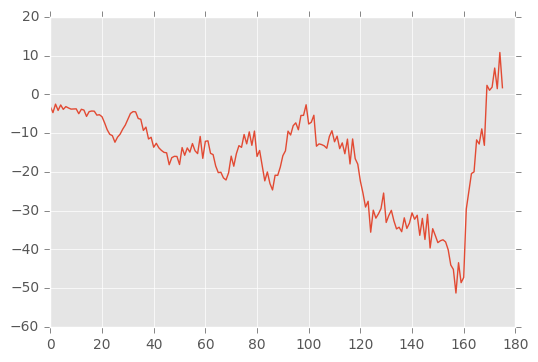

In [133]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [134]:
scaled_resids_arima = scaler(resids_arima)[0]

In [135]:
lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0507
Epoch 2/100
0s - loss: 0.0458
Epoch 3/100
0s - loss: 0.0427
Epoch 4/100
0s - loss: 0.0380
Epoch 5/100
0s - loss: 0.0395
Epoch 6/100
0s - loss: 0.0394
Epoch 7/100
0s - loss: 0.0382
Epoch 8/100
0s - loss: 0.0378
Epoch 9/100
0s - loss: 0.0381
Epoch 10/100
0s - loss: 0.0380
Epoch 11/100
0s - loss: 0.0403
Epoch 12/100
0s - loss: 0.0390
Epoch 13/100
0s - loss: 0.0377
Epoch 14/100
0s - loss: 0.0371
Epoch 15/100
0s - loss: 0.0384
Epoch 16/100
0s - loss: 0.0377
Epoch 17/100
0s - loss: 0.0376
Epoch 18/100
0s - loss: 0.0369
Epoch 19/100
0s - loss: 0.0363
Epoch 20/100
0s - loss: 0.0346
Epoch 21/100
0s - loss: 0.0350
Epoch 22/100
0s - loss: 0.0346
Epoch 23/100
0s - loss: 0.0334
Epoch 24/100
0s - loss: 0.0299
Epoch 25/100
0s - loss: 0.0289
Epoch 26/100
0s - loss: 0.0266
Epoch 27/100
0s - loss: 0.0241
Epoch 28/100
0s - loss: 0.0210
Epoch 29/100
0s - loss: 0.0179
Epoch 30/100
0s - loss: 0.0187
Epoch 31/100
0s - loss: 0.0135
Epoch 32/100
0s - loss: 0.0160
Epoch 33/100
0s -

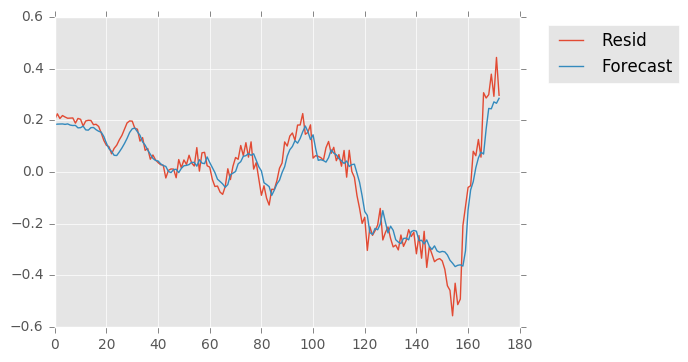

In [136]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [137]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

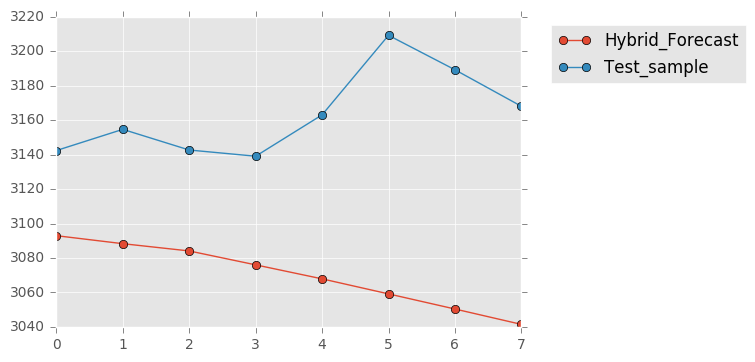

In [138]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [139]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 93.552023814891527,
 'MSE': 10150.771431008612,
 'RMSE': 100.75103687311913}

---

---

---

# Real Government Consumption Expenditures and Gross Investment, Chained Dollars

In [3]:
real_gov_ci = df.iloc[40, 1:66].copy()
real_gov_ci.index = pd.DatetimeIndex(start='1999-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                 -2.775523
p-value                         0.061856
#Lags Used                      6.000000
Number of Observations Used    58.000000
Critical Value (10%)           -2.594129
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
dtype: float64


Results of KPSS Test:
Test Statistic            0.510523
p-value                   0.039297
#Lags Used               11.000000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
Critical Value (1%)       0.739000
dtype: float64


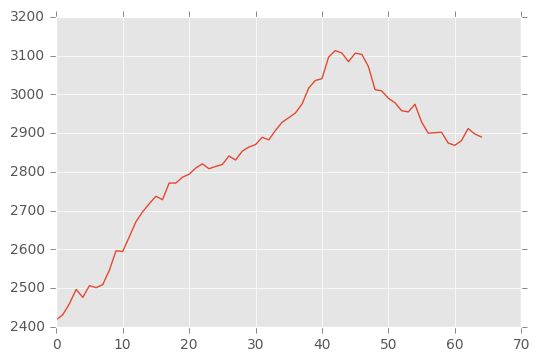

In [4]:
test_stationarity(real_gov_ci)

Results of Dickey-Fuller Test:
Test Statistic                 -1.787689
p-value                         0.386591
#Lags Used                      7.000000
Number of Observations Used    56.000000
Critical Value (10%)           -2.595137
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
dtype: float64


Results of KPSS Test:
Test Statistic            0.410652
p-value                   0.072564
#Lags Used               11.000000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
Critical Value (1%)       0.739000
dtype: float64


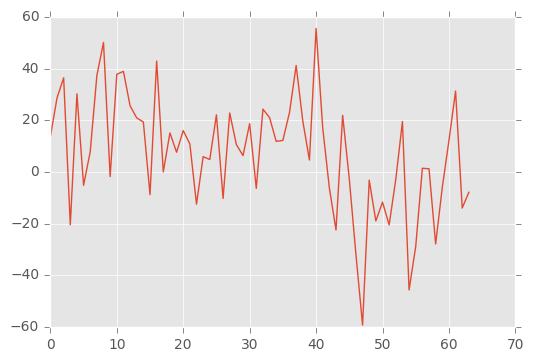

In [5]:
test_stationarity(diff_series(real_gov_ci))

Results of Dickey-Fuller Test:
Test Statistic                 -3.495373
p-value                         0.008107
#Lags Used                      6.000000
Number of Observations Used    56.000000
Critical Value (10%)           -2.595137
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
dtype: float64


Results of KPSS Test:
Test Statistic            0.105765
p-value                   0.100000
#Lags Used               11.000000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
Critical Value (1%)       0.739000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


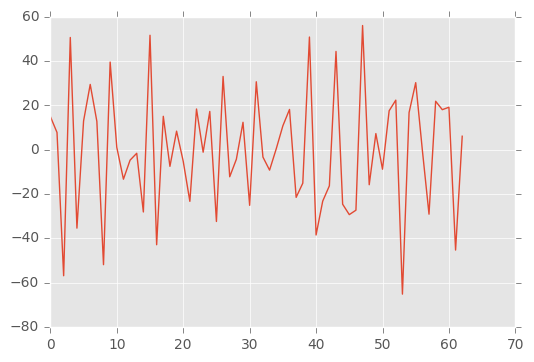

In [6]:
test_stationarity(diff_series(diff_series(real_gov_ci)))

In [7]:
train = real_gov_ci[:-8]
test = real_gov_ci[-8:]

### ARIMA

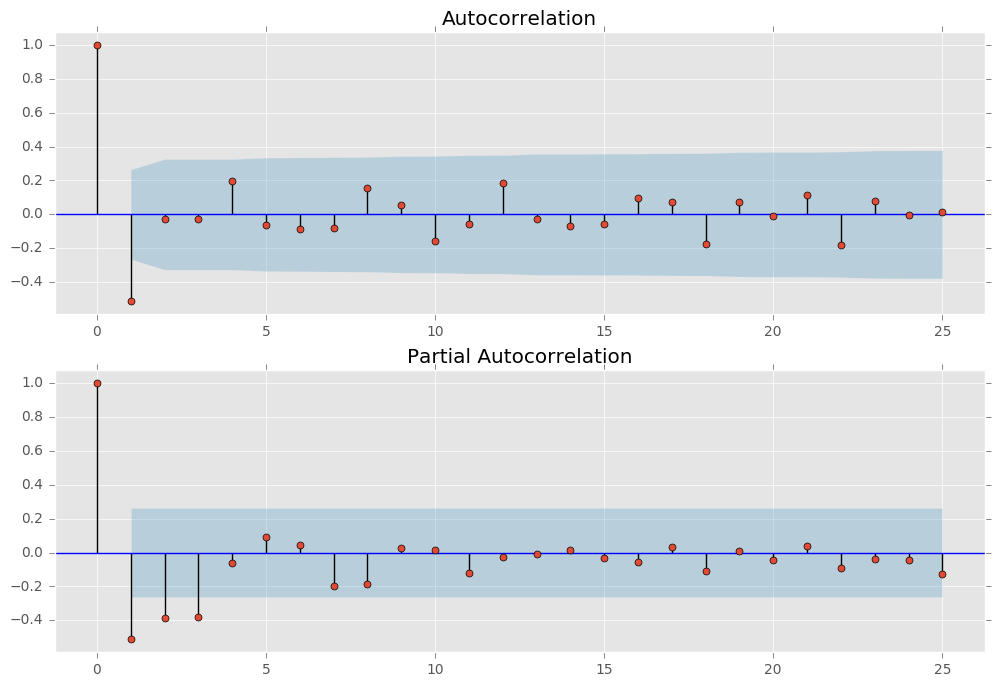

In [8]:
correlogram(diff_series(diff_series(train)))

In [9]:
arima_model = ARIMA(np.array(train), order=(1,2,2)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   55
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -245.231
Method:                       css-mle   S.D. of innovations             20.332
Date:                Wed, 10 May 2017   AIC                            500.463
Time:                        18:13:46   BIC                            510.500
Sample:                             2   HQIC                           504.344
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6775      0.267     -2.535      0.014      -1.201      -0.154
ar.L1.D2.y     0.8392      0.184      4.572      0.000       0.479       1.199
ma.L1.D2.y    -1.7077      0.204     -8.388      0.0

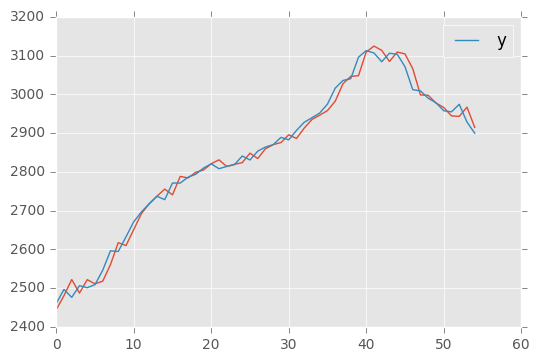

In [10]:
arima_model.plot_predict()
plt.show()

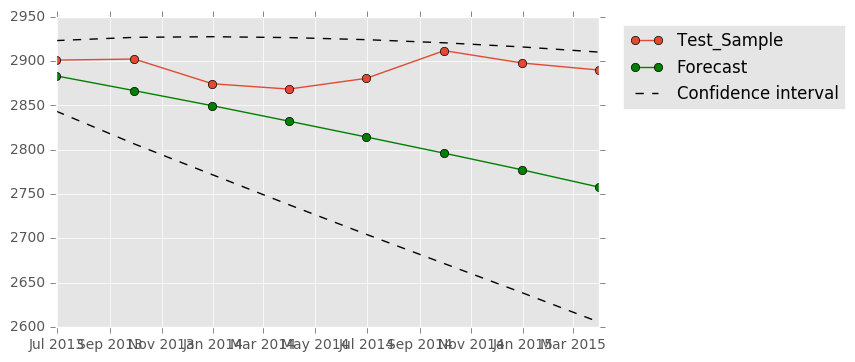

In [11]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [12]:
errors_out_sample(test, forc_arima[0])

{'MAE': 68.645102945969938,
 'MSE': 6662.8131525575718,
 'RMSE': 81.626056823526469}

### ANN

In [13]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

In [14]:
def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0742
Epoch 2/100
0s - loss: 0.0687
Epoch 3/100
0s - loss: 0.0681
Epoch 4/100
0s - loss: 0.0710
Epoch 5/100
0s - loss: 0.0667
Epoch 6/100
0s - loss: 0.0669
Epoch 7/100
0s - loss: 0.0633
Epoch 8/100
0s - loss: 0.0606
Epoch 9/100
0s - loss: 0.0590
Epoch 10/100
0s - loss: 0.0591
Epoch 11/100
0s - loss: 0.0547
Epoch 12/100
0s - loss: 0.0536
Epoch 13/100
0s - loss: 0.0499
Epoch 14/100
0s - loss: 0.0491
Epoch 15/100
0s - loss: 0.0442
Epoch 16/100
0s - loss: 0.0410
Epoch 17/100
0s - loss: 0.0374
Epoch 18/100
0s - loss: 0.0338
Epoch 19/100
0s - loss: 0.0301
Epoch 20/100
0s - loss: 0.0267
Epoch 21/100
0s - loss: 0.0219
Epoch 22/100
0s - loss: 0.0187
Epoch 23/100
0s - loss: 0.0151
Epoch 24/100
0s - loss: 0.0118
Epoch 25/100
0s - loss: 0.0093
Epoch 26/100
0s - loss: 0.0073
Epoch 27/100
0s - loss: 0.0054
Epoch 28/100
0s - loss: 0.0043
Epoch 29/100
0s - loss: 0.0032
Epoch 30/100
0s - loss: 0.0027
Epoch 31/100
0s - loss: 0.0022
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

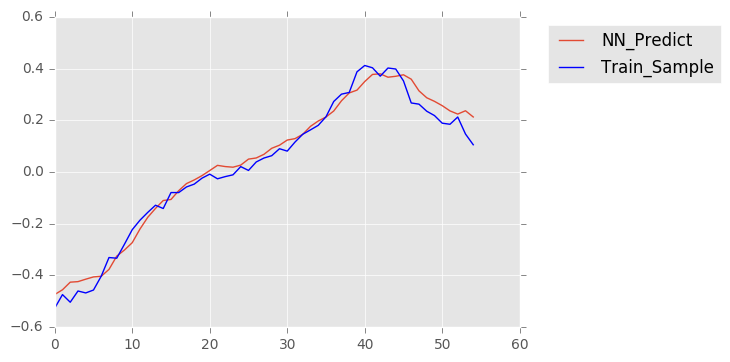

In [15]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

In [16]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

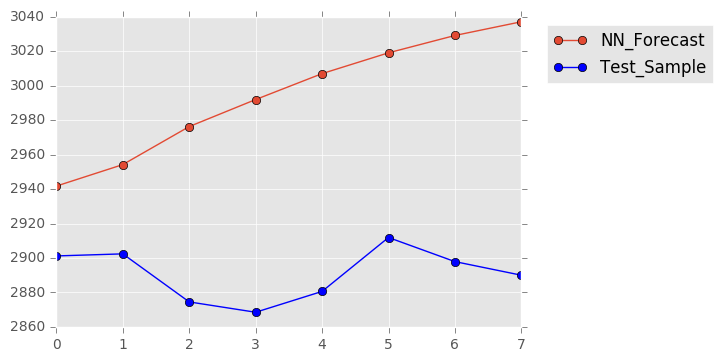

In [17]:
nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [18]:
errors_out_sample(test, nn_forecast)

{'MAE': 103.73779296875, 'MSE': 12043.450938198566, 'RMSE': 109.74265778720036}

### Hybrid

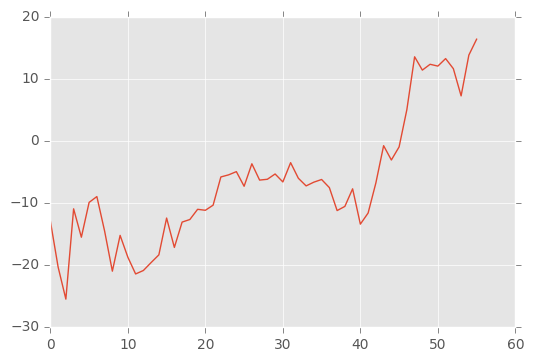

In [19]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [20]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.3216
Epoch 2/100
0s - loss: 0.1068
Epoch 3/100
0s - loss: 0.0801
Epoch 4/100
0s - loss: 0.0622
Epoch 5/100
0s - loss: 0.0747
Epoch 6/100
0s - loss: 0.0591
Epoch 7/100
0s - loss: 0.0689
Epoch 8/100
0s - loss: 0.0704
Epoch 9/100
0s - loss: 0.0606
Epoch 10/100
0s - loss: 0.0573
Epoch 11/100
0s - loss: 0.0576
Epoch 12/100
0s - loss: 0.0716
Epoch 13/100
0s - loss: 0.0641
Epoch 14/100
0s - loss: 0.0551
Epoch 15/100
0s - loss: 0.0682
Epoch 16/100
0s - loss: 0.0661
Epoch 17/100
0s - loss: 0.0660
Epoch 18/100
0s - loss: 0.0576
Epoch 19/100
0s - loss: 0.0648
Epoch 20/100
0s - loss: 0.0583
Epoch 21/100
0s - loss: 0.0620
Epoch 22/100
0s - loss: 0.0593
Epoch 23/100
0s - loss: 0.0594
Epoch 24/100
0s - loss: 0.0572
Epoch 25/100
0s - loss: 0.0584
Epoch 26/100
0s - loss: 0.0578
Epoch 27/100
0s - loss: 0.0596
Epoch 28/100
0s - loss: 0.0583
Epoch 29/100
0s - loss: 0.0581
Epoch 30/100
0s - loss: 0.0591
Epoch 31/100
0s - loss: 0.0605
Epoch 32/100
0s - loss: 0.0595
Epoch 33/100
0s -

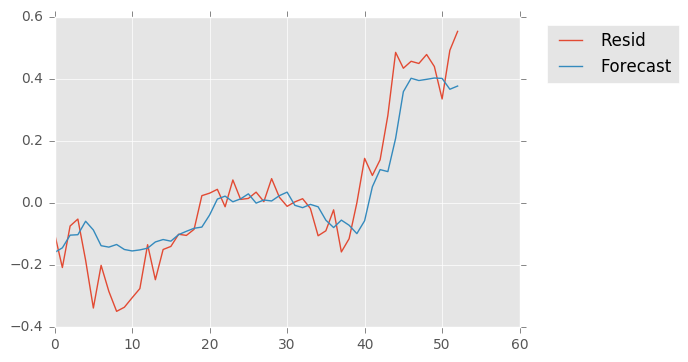

In [21]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [22]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

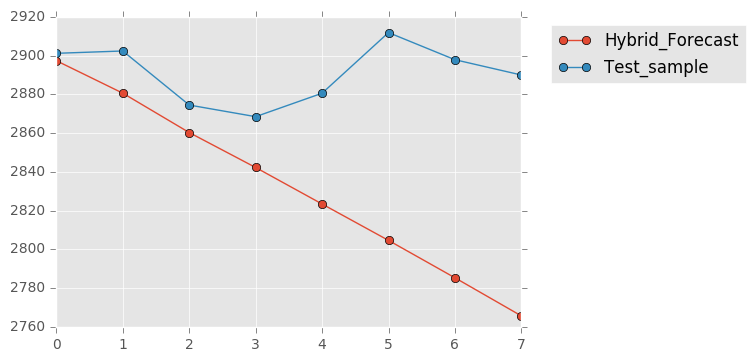

In [23]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [24]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 58.417337207005858,
 'MSE': 5534.7992893170313,
 'RMSE': 74.396231687613266}

In [25]:
nn_resids_forecast

array([ 13.98752785,  13.90067101,  10.59934044,   9.97189522,
         8.9828434 ,   8.52988243,   8.07445908,   7.7755065 ], dtype=float32)

---

---

---

# Personal Income and Its Disposition

In [189]:
pers_inc = df.iloc[48, 1:186].copy()
pers_inc.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   4.061463
p-value                          1.000000
#Lags Used                      12.000000
Number of Observations Used    172.000000
Critical Value (1%)             -3.468952
Critical Value (10%)            -2.575809
Critical Value (5%)             -2.878495
dtype: float64


Results of KPSS Test:
Test Statistic            1.308789
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


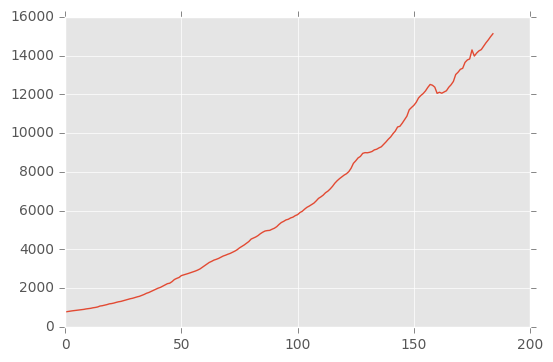

In [190]:
test_stationarity(pers_inc)

Results of Dickey-Fuller Test:
Test Statistic                  -2.563036
p-value                          0.100880
#Lags Used                      14.000000
Number of Observations Used    169.000000
Critical Value (1%)             -3.469648
Critical Value (10%)            -2.575971
Critical Value (5%)             -2.878799
dtype: float64


Results of KPSS Test:
Test Statistic            0.980676
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


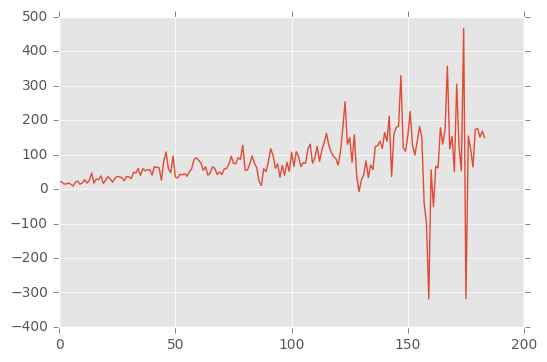

In [191]:
test_stationarity(diff_series(pers_inc))

Results of Dickey-Fuller Test:
Test Statistic                -6.837962e+00
p-value                        1.821920e-09
#Lags Used                     1.400000e+01
Number of Observations Used    1.680000e+02
Critical Value (1%)           -3.469886e+00
Critical Value (10%)          -2.576027e+00
Critical Value (5%)           -2.878903e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.036527
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


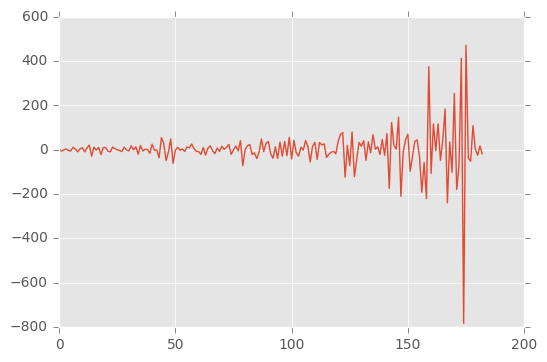

In [192]:
test_stationarity(diff_series(diff_series(pers_inc)))

In [194]:
train = pers_inc[:-8]
test = pers_inc[-8:]

### ARIMA

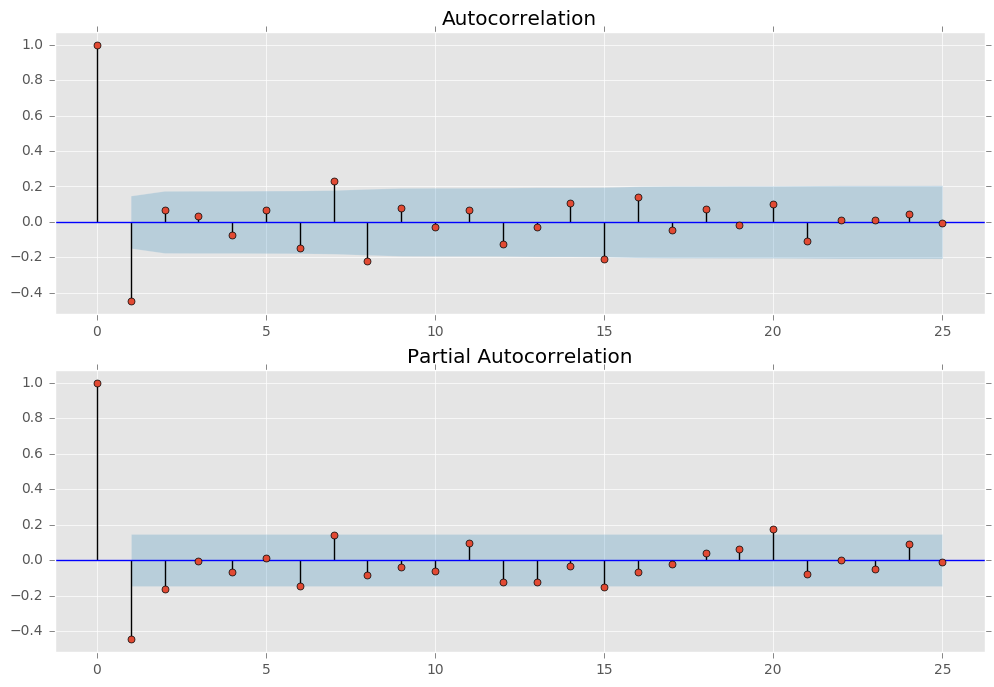

In [195]:
correlogram(diff_series(diff_series(train)))

In [196]:
arima_model = ARIMA(np.array(train), order=(1,2,2)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  175
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -1003.601
Method:                       css-mle   S.D. of innovations             74.712
Date:                Tue, 09 May 2017   AIC                           2015.201
Time:                        02:41:52   BIC                           2027.860
Sample:                             2   HQIC                          2020.336
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.5412      0.191     -2.840      0.005      -0.915      -0.168
ma.L1.D2.y    -0.3340      0.182     -1.831      0.069      -0.691       0.023
ma.L2.D2.y    -0.0986      0.156     -0.632      0.5

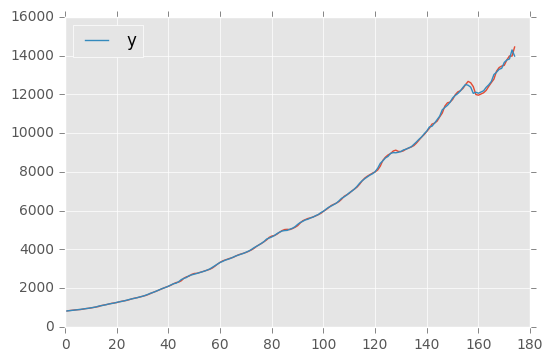

In [197]:
arima_model.plot_predict()
plt.show()

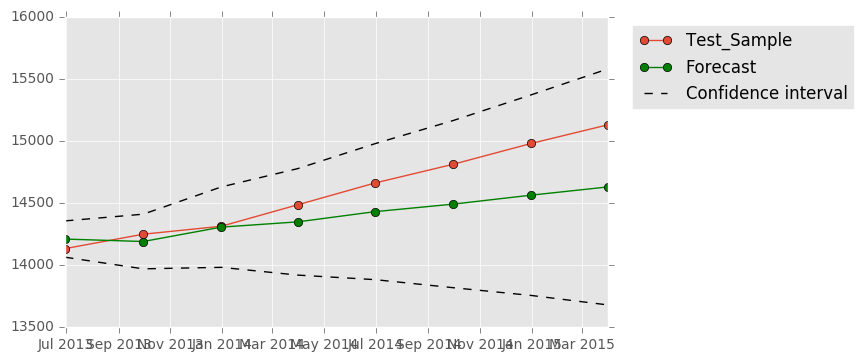

In [198]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [199]:
errors_out_sample(test, forc_arima[0])

{'MAE': 218.84159694082155,
 'MSE': 76186.551889315102,
 'RMSE': 276.01911507958124}

### ANN

In [200]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.1576
Epoch 2/100
0s - loss: 0.1029
Epoch 3/100
0s - loss: 0.0976
Epoch 4/100
0s - loss: 0.0941
Epoch 5/100
0s - loss: 0.0886
Epoch 6/100
0s - loss: 0.0934
Epoch 7/100
0s - loss: 0.0913
Epoch 8/100
0s - loss: 0.0853
Epoch 9/100
0s - loss: 0.0874
Epoch 10/100
0s - loss: 0.0803
Epoch 11/100
0s - loss: 0.0907
Epoch 12/100
0s - loss: 0.0827
Epoch 13/100
0s - loss: 0.0796
Epoch 14/100
0s - loss: 0.0717
Epoch 15/100
0s - loss: 0.0766
Epoch 16/100
0s - loss: 0.0590
Epoch 17/100
0s - loss: 0.0568
Epoch 18/100
0s - loss: 0.0526
Epoch 19/100
0s - loss: 0.0457
Epoch 20/100
0s - loss: 0.0411
Epoch 21/100
0s - loss: 0.0356
Epoch 22/100
0s - loss: 0.0380
Epoch 23/100
0s - loss: 0.0355
Epoch 24/100
0s - loss: 0.0294
Epoch 25/100
0s - loss: 0.0244
Epoch 26/100
0s - loss: 0.0283
Epoch 27/100
0s - loss: 0.0320
Epoch 28/100
0s - loss: 0.0286
Epoch 29/100
0s - loss: 0.0237
Epoch 30/100
0s - loss: 0.0204
Epoch 31/100
0s - loss: 0.0179
Epoch 32/100
0s - loss: 0.0185
Epoch 33/100
0s -

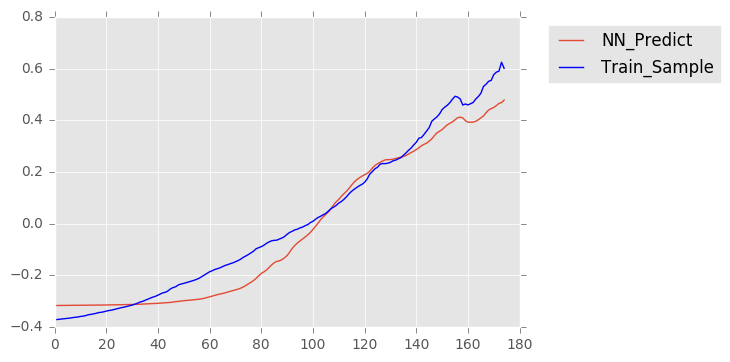

In [201]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

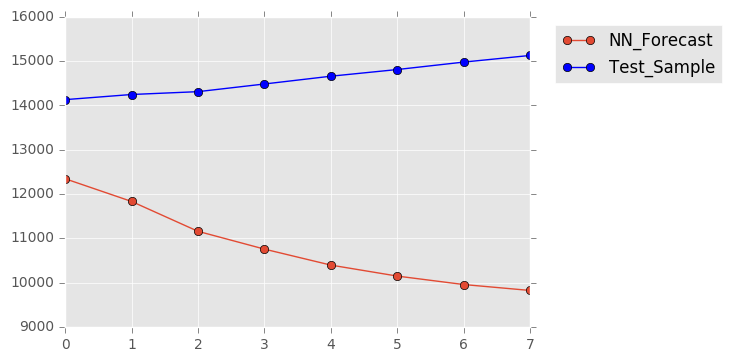

In [202]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [203]:
errors_out_sample(test, forc_arima[0])

{'MAE': 218.84159694082155,
 'MSE': 76186.551889315102,
 'RMSE': 276.01911507958124}

### Hybrid

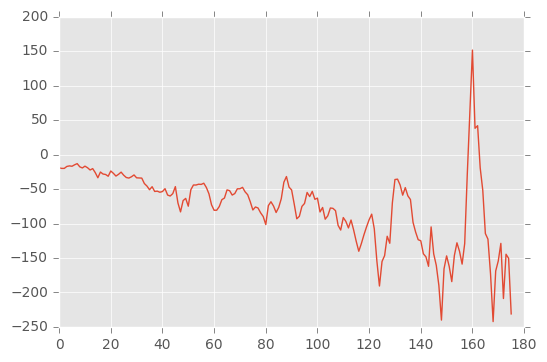

In [204]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [205]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 4

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1014
Epoch 2/100
0s - loss: 0.0287
Epoch 3/100
0s - loss: 0.0267
Epoch 4/100
0s - loss: 0.0228
Epoch 5/100
0s - loss: 0.0197
Epoch 6/100
0s - loss: 0.0215
Epoch 7/100
0s - loss: 0.0191
Epoch 8/100
0s - loss: 0.0196
Epoch 9/100
0s - loss: 0.0188
Epoch 10/100
0s - loss: 0.0202
Epoch 11/100
0s - loss: 0.0201
Epoch 12/100
0s - loss: 0.0184
Epoch 13/100
0s - loss: 0.0193
Epoch 14/100
0s - loss: 0.0191
Epoch 15/100
0s - loss: 0.0202
Epoch 16/100
0s - loss: 0.0185
Epoch 17/100
0s - loss: 0.0194
Epoch 18/100
0s - loss: 0.0184
Epoch 19/100
0s - loss: 0.0179
Epoch 20/100
0s - loss: 0.0181
Epoch 21/100
0s - loss: 0.0172
Epoch 22/100
0s - loss: 0.0175
Epoch 23/100
0s - loss: 0.0172
Epoch 24/100
0s - loss: 0.0170
Epoch 25/100
0s - loss: 0.0182
Epoch 26/100
0s - loss: 0.0170
Epoch 27/100
0s - loss: 0.0152
Epoch 28/100
0s - loss: 0.0147
Epoch 29/100
0s - loss: 0.0134
Epoch 30/100
0s - loss: 0.0157
Epoch 31/100
0s - loss: 0.0140
Epoch 32/100
0s - loss: 0.0133
Epoch 33/100
0s -

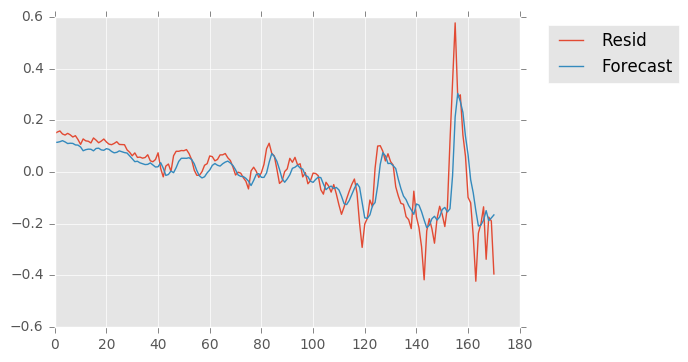

In [206]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [207]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

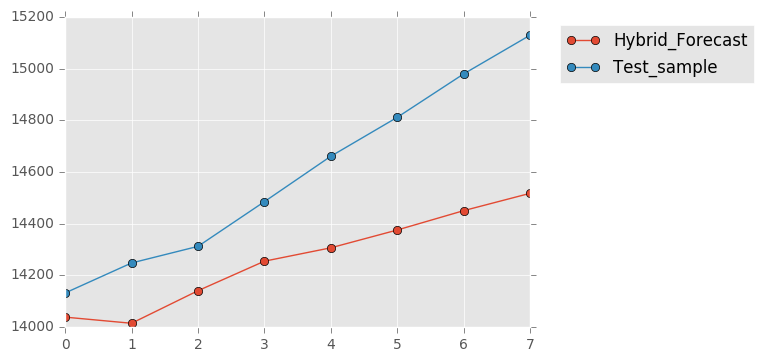

In [208]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [209]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 332.6236010334087,
 'MSE': 139561.25309231406,
 'RMSE': 373.57897838651741}

In [210]:
nn_resids_forecast

array([-170.56033325, -174.512146  , -164.50076294,  -92.74157715,
       -123.15242767, -114.96250916, -112.45085144, -111.46688843], dtype=float32)

---

---

---

# Wages and salaries

In [211]:
wages = df.iloc[49, 1:186].copy()
wages.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   2.094862
p-value                          0.998784
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (10%)            -2.575917
Critical Value (5%)             -2.878696
dtype: float64


Results of KPSS Test:
Test Statistic            1.320211
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


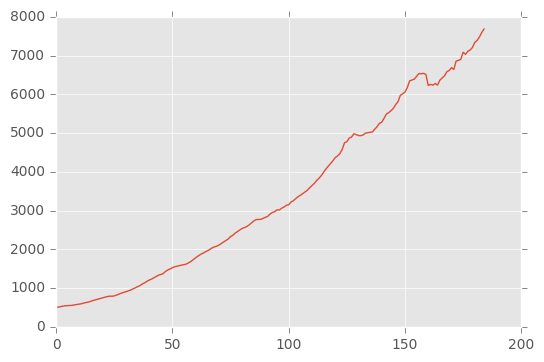

In [212]:
test_stationarity(wages)

Results of Dickey-Fuller Test:
Test Statistic                  -2.624336
p-value                          0.088071
#Lags Used                      13.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (10%)            -2.575917
Critical Value (5%)             -2.878696
dtype: float64


Results of KPSS Test:
Test Statistic            0.644206
p-value                   0.018618
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


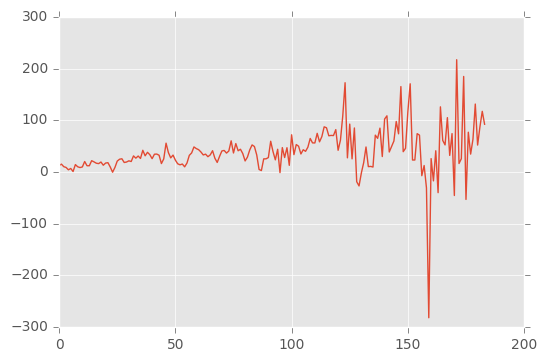

In [213]:
test_stationarity(diff_series(wages))

Results of Dickey-Fuller Test:
Test Statistic                -5.853942e+00
p-value                        3.536029e-07
#Lags Used                     1.200000e+01
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (10%)          -2.575917e+00
Critical Value (5%)           -2.878696e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.040097
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


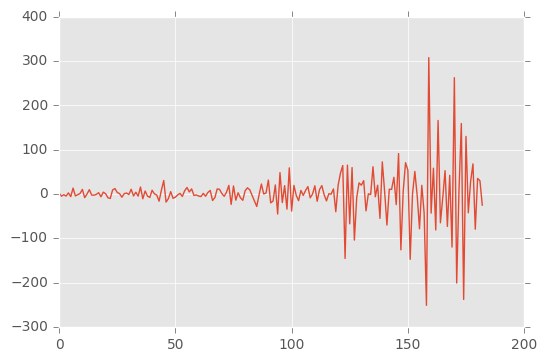

In [214]:
test_stationarity(diff_series(diff_series(wages)))

In [216]:
train = wages[:-8]
test = wages[-8:]

### ARIMA

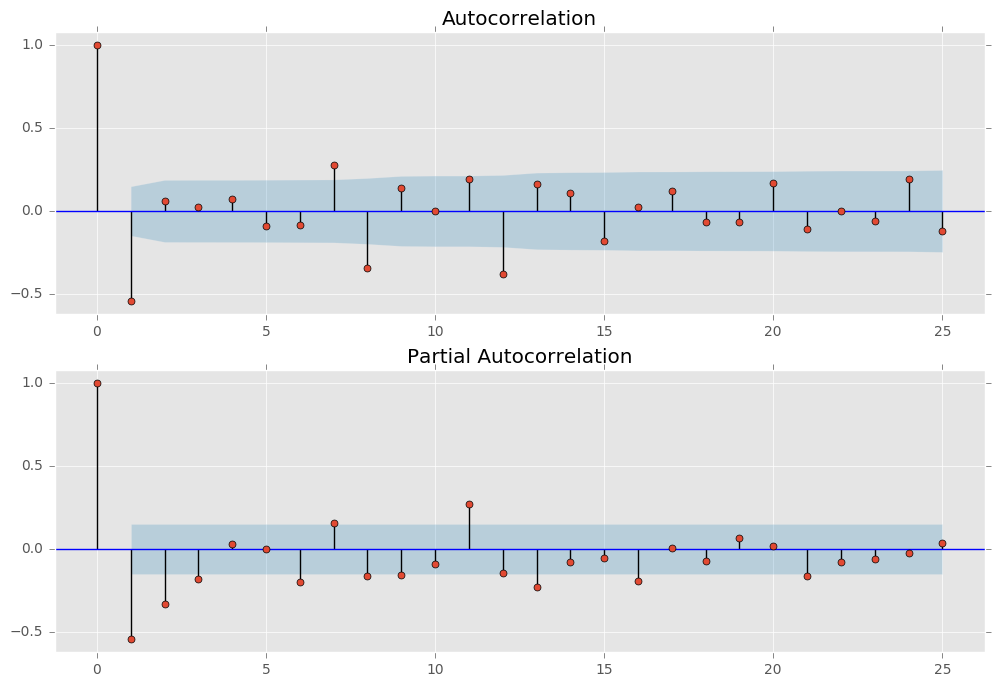

In [217]:
correlogram(diff_series(diff_series(train)))

In [218]:
arima_model = ARIMA(np.array(train), order=(2,2,1)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  175
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -909.230
Method:                       css-mle   S.D. of innovations             43.567
Date:                Tue, 09 May 2017   AIC                           1826.460
Time:                        02:44:07   BIC                           1839.119
Sample:                             2   HQIC                          1831.595
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D2.y    -0.3296      0.245     -1.345      0.180      -0.810       0.151
ar.L2.D2.y    -0.0852      0.192     -0.444      0.658      -0.461       0.291
ma.L1.D2.y    -0.5404      0.243     -2.222      0.0

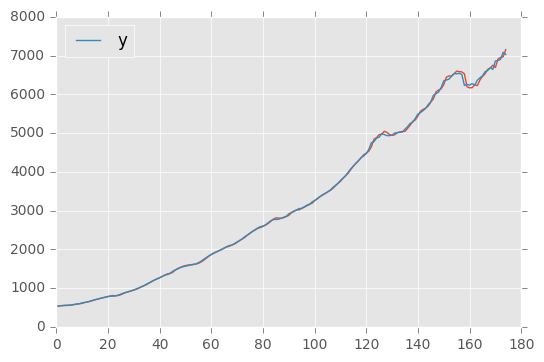

In [219]:
arima_model.plot_predict()
plt.show()

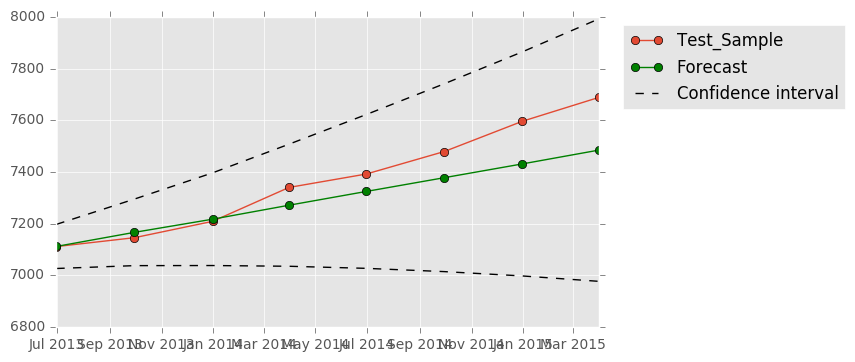

In [220]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [221]:
errors_out_sample(test, forc_arima[0])

{'MAE': 79.530901499189213,
 'MSE': 11114.240561829629,
 'RMSE': 105.42409858201127}

### ANN

In [222]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.1860
Epoch 2/100
0s - loss: 0.1159
Epoch 3/100
0s - loss: 0.0874
Epoch 4/100
0s - loss: 0.0928
Epoch 5/100
0s - loss: 0.0962
Epoch 6/100
0s - loss: 0.0865
Epoch 7/100
0s - loss: 0.0778
Epoch 8/100
0s - loss: 0.0779
Epoch 9/100
0s - loss: 0.0679
Epoch 10/100
0s - loss: 0.0682
Epoch 11/100
0s - loss: 0.0631
Epoch 12/100
0s - loss: 0.0560
Epoch 13/100
0s - loss: 0.0577
Epoch 14/100
0s - loss: 0.0535
Epoch 15/100
0s - loss: 0.0408
Epoch 16/100
0s - loss: 0.0488
Epoch 17/100
0s - loss: 0.0365
Epoch 18/100
0s - loss: 0.0431
Epoch 19/100
0s - loss: 0.0430
Epoch 20/100
0s - loss: 0.0410
Epoch 21/100
0s - loss: 0.0360
Epoch 22/100
0s - loss: 0.0390
Epoch 23/100
0s - loss: 0.0354
Epoch 24/100
0s - loss: 0.0385
Epoch 25/100
0s - loss: 0.0327
Epoch 26/100
0s - loss: 0.0306
Epoch 27/100
0s - loss: 0.0344
Epoch 28/100
0s - loss: 0.0304
Epoch 29/100
0s - loss: 0.0302
Epoch 30/100
0s - loss: 0.0259
Epoch 31/100
0s - loss: 0.0281
Epoch 32/100
0s - loss: 0.0209
Epoch 33/100
0s -

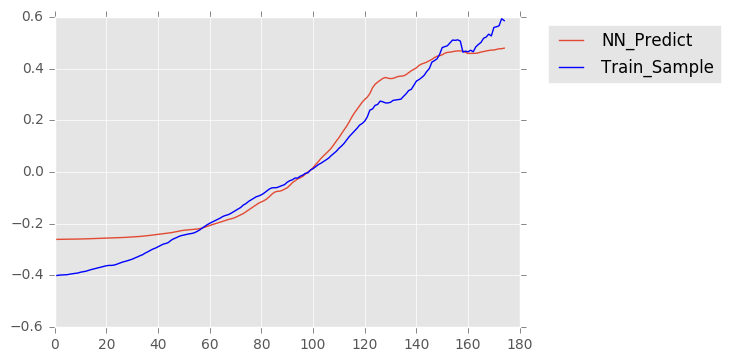

In [223]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

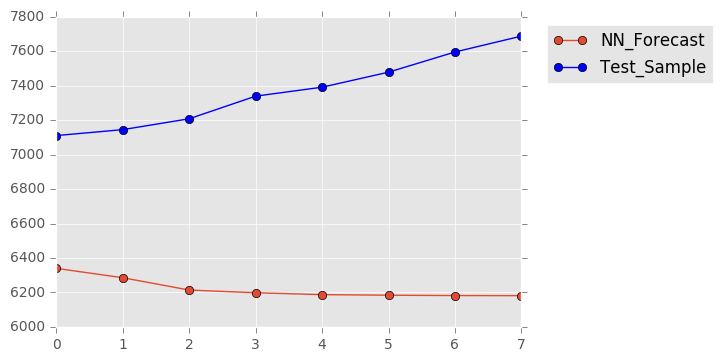

In [224]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [225]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 6891.8513989665917,
 'MSE': 47498840.810626775,
 'RMSE': 6891.9402790960667}

### Hybrid

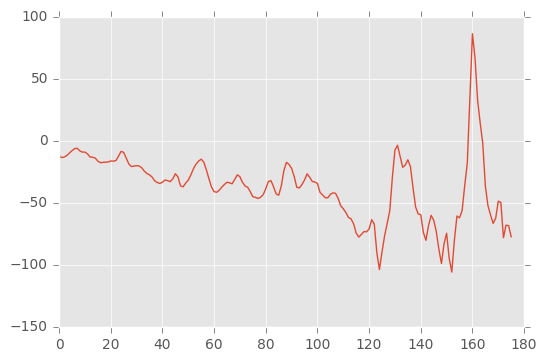

In [226]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [227]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
0s - loss: 0.0594
Epoch 2/100
0s - loss: 0.0478
Epoch 3/100
0s - loss: 0.0349
Epoch 4/100
0s - loss: 0.0276
Epoch 5/100
0s - loss: 0.0242
Epoch 6/100
0s - loss: 0.0234
Epoch 7/100
0s - loss: 0.0239
Epoch 8/100
0s - loss: 0.0221
Epoch 9/100
0s - loss: 0.0219
Epoch 10/100
0s - loss: 0.0204
Epoch 11/100
0s - loss: 0.0216
Epoch 12/100
0s - loss: 0.0213
Epoch 13/100
0s - loss: 0.0199
Epoch 14/100
0s - loss: 0.0208
Epoch 15/100
0s - loss: 0.0200
Epoch 16/100
0s - loss: 0.0210
Epoch 17/100
0s - loss: 0.0203
Epoch 18/100
0s - loss: 0.0210
Epoch 19/100
0s - loss: 0.0188
Epoch 20/100
0s - loss: 0.0195
Epoch 21/100
0s - loss: 0.0203
Epoch 22/100
0s - loss: 0.0206
Epoch 23/100
0s - loss: 0.0197
Epoch 24/100
0s - loss: 0.0197
Epoch 25/100
0s - loss: 0.0192
Epoch 26/100
0s - loss: 0.0184
Epoch 27/100
0s - loss: 0.0186
Epoch 28/100
0s - loss: 0.0186
Epoch 29/100
0s - loss: 0.0185
Epoch 30/100
0s - loss: 0.0191
Epoch 31/100
0s - loss: 0.0166
Epoch 32/100
0s - loss: 0.0184
Epoch 33/100
0s -

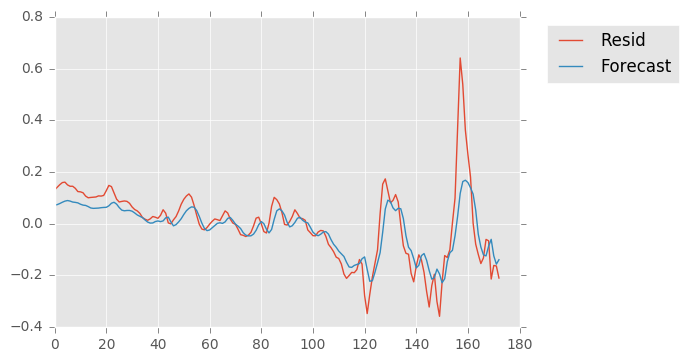

In [228]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [229]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

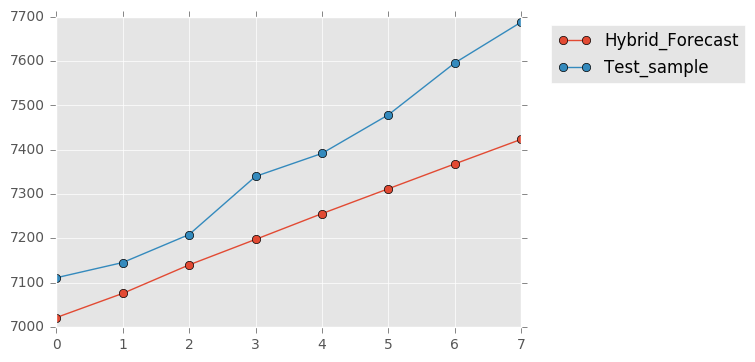

In [230]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [231]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 145.74815500295199,
 'MSE': 25787.167921862914,
 'RMSE': 160.58383455959356}

In [232]:
nn_resids_forecast

array([-90.39108276, -90.39108276, -76.8963623 , -73.42651367,
       -68.5032196 , -65.65866852, -62.88855743, -60.77388763], dtype=float32)

---

---

---

# Personal consumption expenditures (PCE)

In [233]:
pers_consump_exp = df.iloc[55, 1:186].copy()
pers_consump_exp.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   0.975815
p-value                          0.994004
#Lags Used                       3.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (10%)            -2.575355
Critical Value (5%)             -2.877644
dtype: float64


Results of KPSS Test:
Test Statistic            1.321437
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


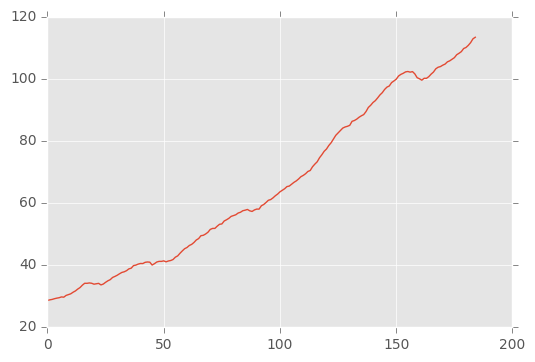

In [234]:
test_stationarity(pers_consump_exp)

Results of Dickey-Fuller Test:
Test Statistic                  -3.731468
p-value                          0.003692
#Lags Used                       2.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (10%)            -2.575355
Critical Value (5%)             -2.877644
dtype: float64


Results of KPSS Test:
Test Statistic            0.401991
p-value                   0.076297
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


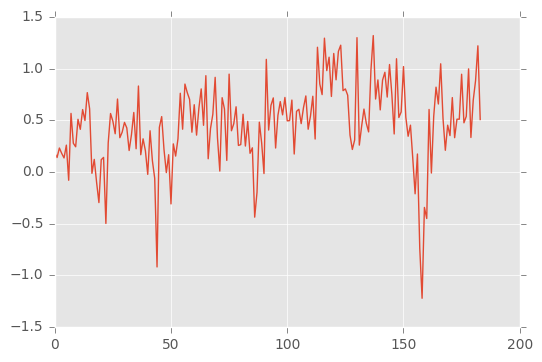

In [235]:
test_stationarity(diff_series(pers_consump_exp))

In [236]:
train = pers_consump_exp[:-8]
test = pers_consump_exp[-8:]

### ARIMA

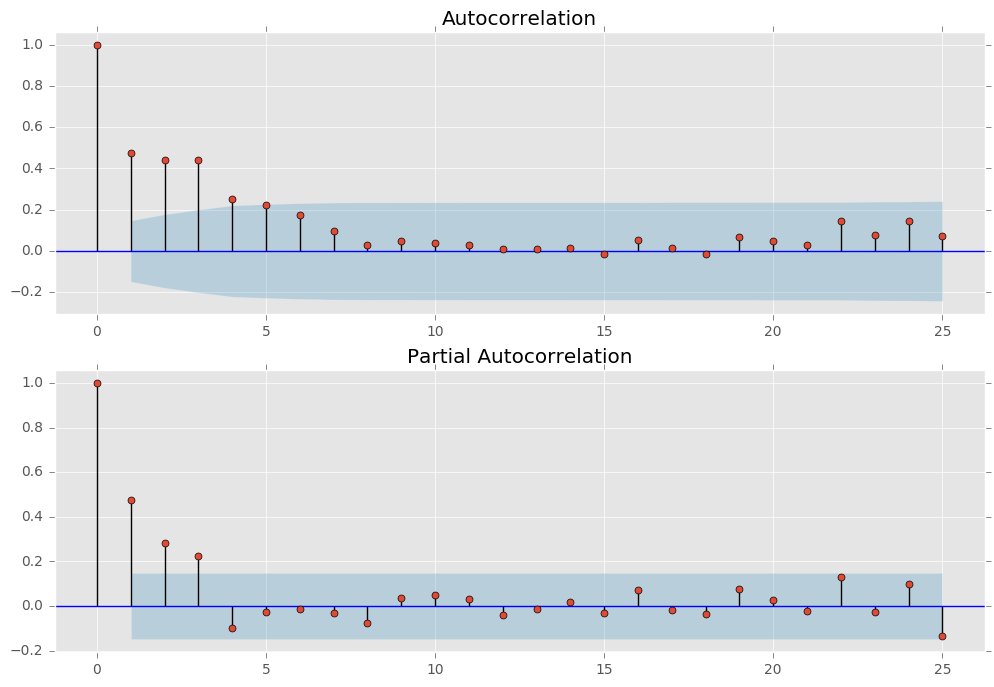

In [237]:
correlogram(diff_series(train))

In [238]:
arima_model = ARIMA(np.array(train), order=(4,1,1)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  176
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -58.292
Method:                       css-mle   S.D. of innovations              0.336
Date:                Tue, 09 May 2017   AIC                            128.585
Time:                        02:45:59   BIC                            147.608
Sample:                             1   HQIC                           136.300
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y     -0.3397      0.588     -0.578      0.564      -1.492       0.813
ar.L2.D.y      0.5190      0.203      2.559      0.011       0.121       0.917
ar.L3.D.y      0.4875      0.160      3.042      0.0

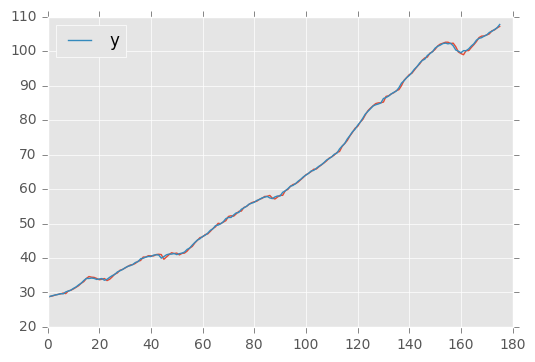

In [239]:
arima_model.plot_predict()
plt.show()

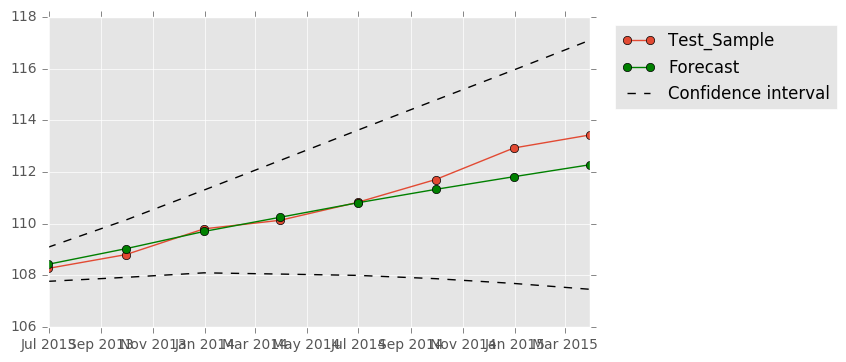

In [240]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [241]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.40903824790260046,
 'MSE': 0.35170694974696393,
 'RMSE': 0.59304885949385644}

### ANN

In [242]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.1956
Epoch 2/100
0s - loss: 0.1097
Epoch 3/100
0s - loss: 0.1094
Epoch 4/100
0s - loss: 0.0998
Epoch 5/100
0s - loss: 0.1019
Epoch 6/100
0s - loss: 0.0996
Epoch 7/100
0s - loss: 0.0914
Epoch 8/100
0s - loss: 0.0911
Epoch 9/100
0s - loss: 0.0785
Epoch 10/100
0s - loss: 0.0769
Epoch 11/100
0s - loss: 0.0673
Epoch 12/100
0s - loss: 0.0482
Epoch 13/100
0s - loss: 0.0469
Epoch 14/100
0s - loss: 0.0388
Epoch 15/100
0s - loss: 0.0321
Epoch 16/100
0s - loss: 0.0274
Epoch 17/100
0s - loss: 0.0281
Epoch 18/100
0s - loss: 0.0285
Epoch 19/100
0s - loss: 0.0236
Epoch 20/100
0s - loss: 0.0226
Epoch 21/100
0s - loss: 0.0283
Epoch 22/100
0s - loss: 0.0243
Epoch 23/100
0s - loss: 0.0198
Epoch 24/100
0s - loss: 0.0209
Epoch 25/100
0s - loss: 0.0210
Epoch 26/100
0s - loss: 0.0190
Epoch 27/100
0s - loss: 0.0238
Epoch 28/100
0s - loss: 0.0225
Epoch 29/100
0s - loss: 0.0189
Epoch 30/100
0s - loss: 0.0203
Epoch 31/100
0s - loss: 0.0203
Epoch 32/100
0s - loss: 0.0226
Epoch 33/100
0s -

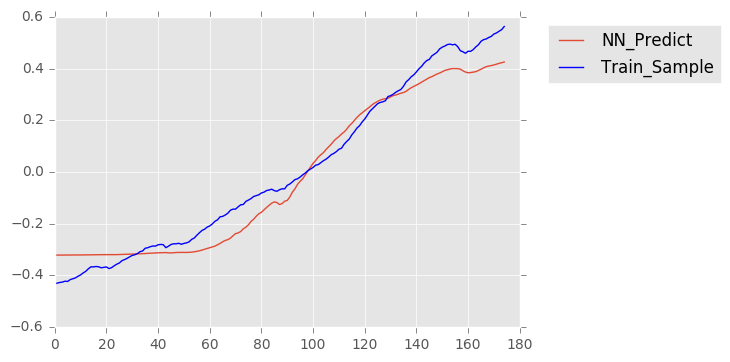

In [243]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

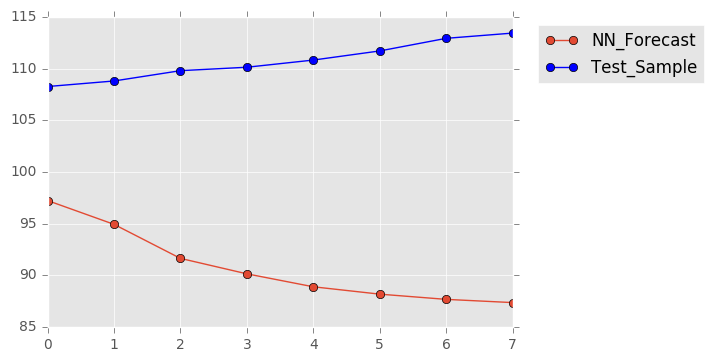

In [244]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [245]:
errors_out_sample(test, nn_forecast)

{'MAE': 19.98655066680908,
 'MSE': 424.73248519052322,
 'RMSE': 20.609038919622702}

### Hybrid

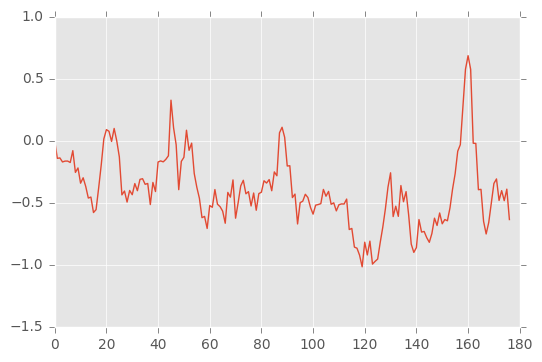

In [246]:
resids_arima = get_resids_arima(train, arima_model, d=1)
plt.plot(resids_arima)
plt.show()

In [247]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 1.7356
Epoch 2/100
0s - loss: 0.4635
Epoch 3/100
0s - loss: 0.3540
Epoch 4/100
0s - loss: 0.2536
Epoch 5/100
0s - loss: 0.2471
Epoch 6/100
0s - loss: 0.1716
Epoch 7/100
0s - loss: 0.1685
Epoch 8/100
0s - loss: 0.1023
Epoch 9/100
0s - loss: 0.1224
Epoch 10/100
0s - loss: 0.0828
Epoch 11/100
0s - loss: 0.0876
Epoch 12/100
0s - loss: 0.0743
Epoch 13/100
0s - loss: 0.0594
Epoch 14/100
0s - loss: 0.0711
Epoch 15/100
0s - loss: 0.0598
Epoch 16/100
0s - loss: 0.0593
Epoch 17/100
0s - loss: 0.0560
Epoch 18/100
0s - loss: 0.0480
Epoch 19/100
0s - loss: 0.0453
Epoch 20/100
0s - loss: 0.0463
Epoch 21/100
0s - loss: 0.0386
Epoch 22/100
0s - loss: 0.0418
Epoch 23/100
0s - loss: 0.0394
Epoch 24/100
0s - loss: 0.0351
Epoch 25/100
0s - loss: 0.0338
Epoch 26/100
0s - loss: 0.0363
Epoch 27/100
0s - loss: 0.0376
Epoch 28/100
0s - loss: 0.0367
Epoch 29/100
0s - loss: 0.0344
Epoch 30/100
0s - loss: 0.0311
Epoch 31/100
0s - loss: 0.0305
Epoch 32/100
0s - loss: 0.0311
Epoch 33/100
0s -

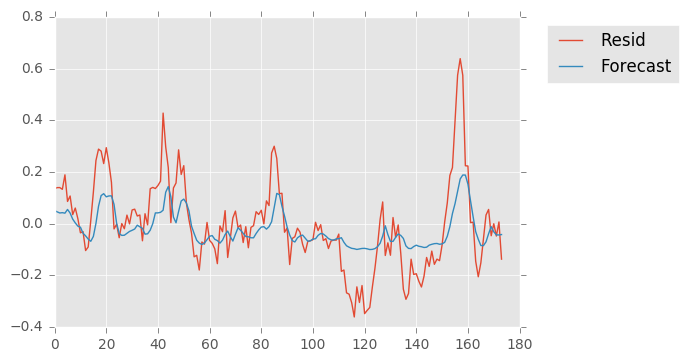

In [248]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [249]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

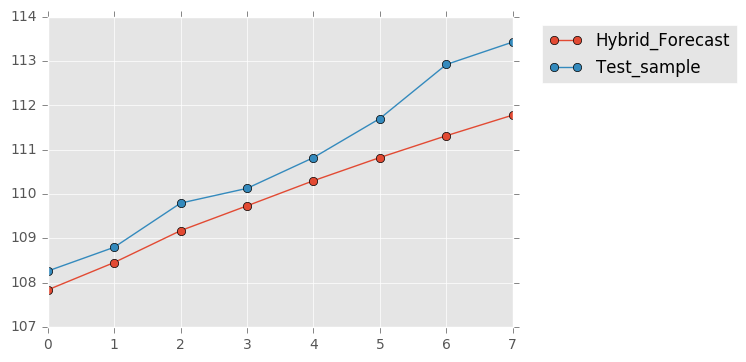

In [250]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [251]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 0.80561313865463191,
 'MSE': 0.89948583196192711,
 'RMSE': 0.94841226898534325}

In [252]:
nn_resids_forecast

array([-0.58433509, -0.57338631, -0.52016211, -0.51138496, -0.50196785,
       -0.49898618, -0.49690878, -0.49604648], dtype=float32)

---

---

---

# Real Personal Consumption Expenditures by Major Type of Product, Quantity Indexes

# Goods

In [253]:
pers_goods = df.iloc[56, 1:186].copy()
pers_goods.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   1.222984
p-value                          0.996141
#Lags Used                       3.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (10%)            -2.575355
Critical Value (5%)             -2.877644
dtype: float64


Results of KPSS Test:
Test Statistic            1.294143
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


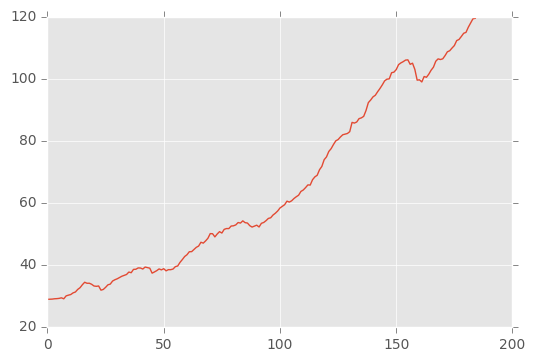

In [254]:
test_stationarity(pers_goods)

Results of Dickey-Fuller Test:
Test Statistic                  -4.720413
p-value                          0.000077
#Lags Used                       2.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (10%)            -2.575355
Critical Value (5%)             -2.877644
dtype: float64


Results of KPSS Test:
Test Statistic            0.450646
p-value                   0.055325
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


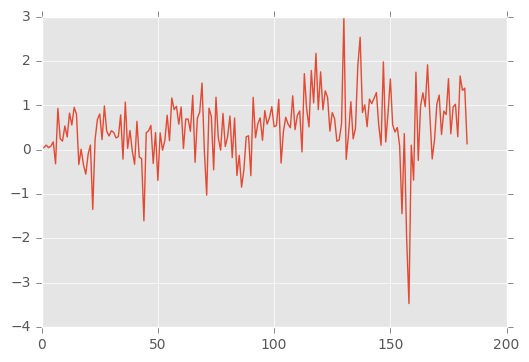

In [255]:
test_stationarity(diff_series(pers_goods))

In [256]:
train = pers_consump_exp[:-8]
test = pers_consump_exp[-8:]

### ARIMA

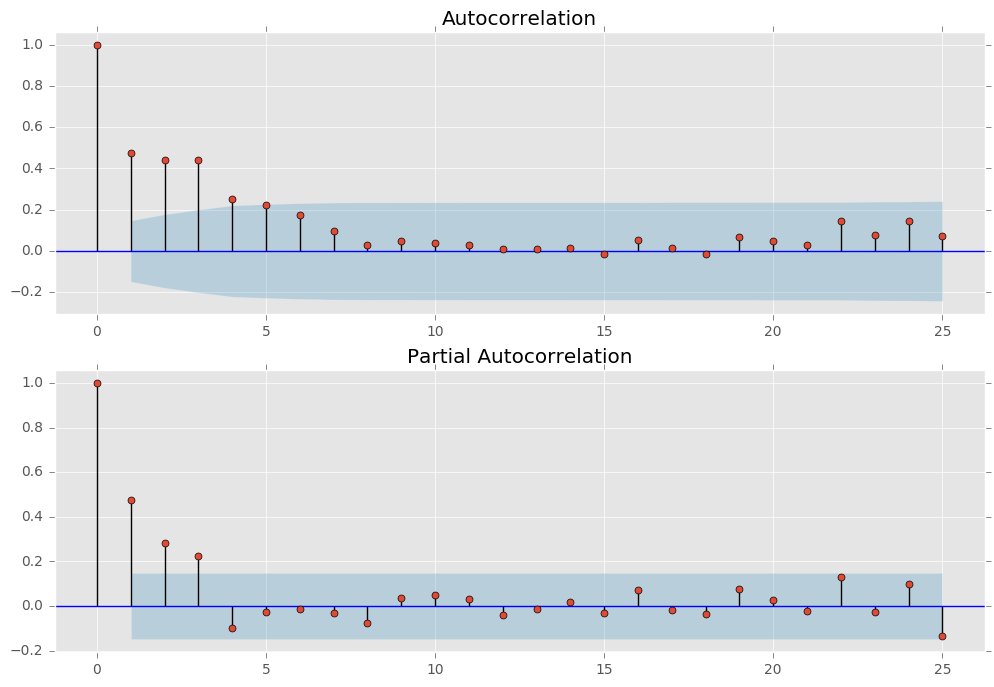

In [257]:
correlogram(diff_series(train))

In [258]:
arima_model = ARIMA(np.array(train), order=(3,1,0)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  176
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -53.363
Method:                       css-mle   S.D. of innovations              0.327
Date:                Tue, 09 May 2017   AIC                            116.726
Time:                        02:48:10   BIC                            132.579
Sample:                             1   HQIC                           123.156
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4506      0.082      5.491      0.000       0.290       0.611
ar.L1.D.y      0.2786      0.074      3.790      0.000       0.135       0.423
ar.L2.D.y      0.2061      0.075      2.754      0.0

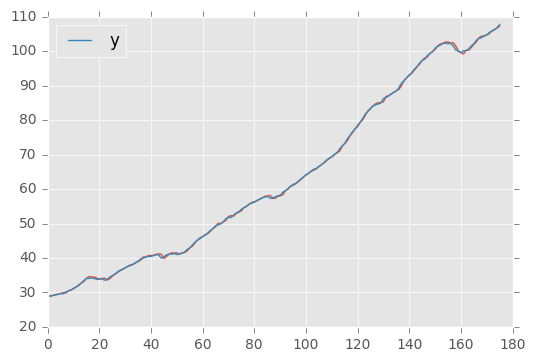

In [259]:
arima_model.plot_predict()
plt.show()

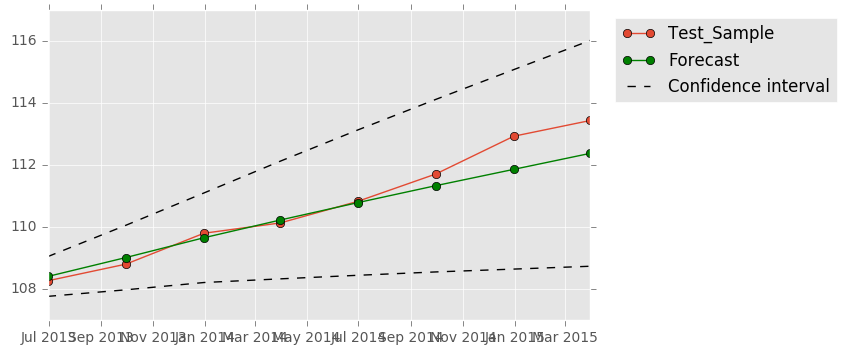

In [260]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [261]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.39197191467721559,
 'MSE': 0.31275942328152995,
 'RMSE': 0.5592489814756304}

---

---

---

### ANN

In [262]:
scaled_train = scaler(train)[0]

lags_for_nn = 3

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
2s - loss: 0.1249
Epoch 2/100
0s - loss: 0.1085
Epoch 3/100
0s - loss: 0.1091
Epoch 4/100
0s - loss: 0.1034
Epoch 5/100
0s - loss: 0.0970
Epoch 6/100
0s - loss: 0.0963
Epoch 7/100
0s - loss: 0.0942
Epoch 8/100
0s - loss: 0.0877
Epoch 9/100
0s - loss: 0.0783
Epoch 10/100
0s - loss: 0.0709
Epoch 11/100
0s - loss: 0.0558
Epoch 12/100
0s - loss: 0.0468
Epoch 13/100
0s - loss: 0.0375
Epoch 14/100
0s - loss: 0.0433
Epoch 15/100
0s - loss: 0.0328
Epoch 16/100
0s - loss: 0.0290
Epoch 17/100
0s - loss: 0.0250
Epoch 18/100
0s - loss: 0.0266
Epoch 19/100
0s - loss: 0.0328
Epoch 20/100
0s - loss: 0.0203
Epoch 21/100
0s - loss: 0.0244
Epoch 22/100
0s - loss: 0.0206
Epoch 23/100
0s - loss: 0.0232
Epoch 24/100
0s - loss: 0.0233
Epoch 25/100
0s - loss: 0.0236
Epoch 26/100
0s - loss: 0.0250
Epoch 27/100
0s - loss: 0.0171
Epoch 28/100
0s - loss: 0.0180
Epoch 29/100
0s - loss: 0.0191
Epoch 30/100
0s - loss: 0.0171
Epoch 31/100
0s - loss: 0.0206
Epoch 32/100
0s - loss: 0.0203
Epoch 33/100
0s -

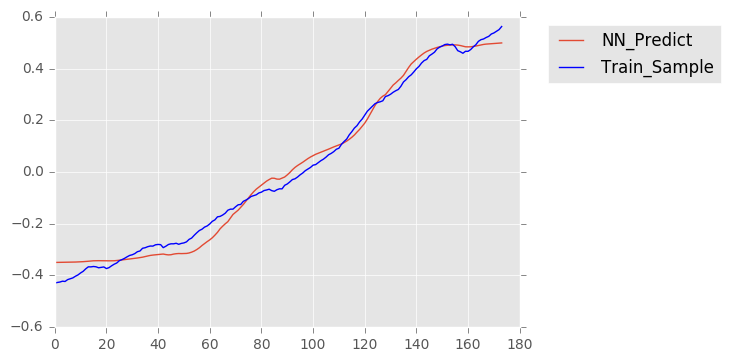

In [263]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

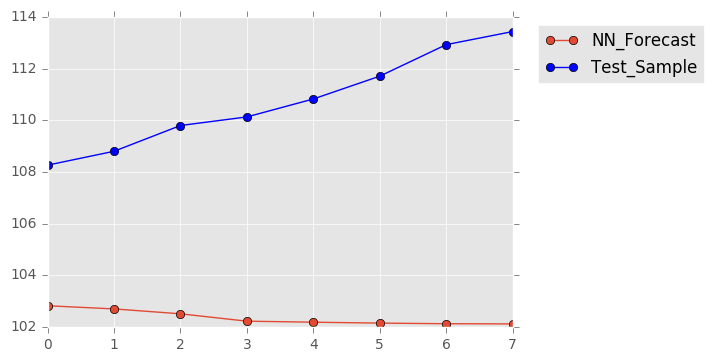

In [264]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [265]:
errors_out_sample(test, nn_forecast)

{'MAE': 8.3821633834838867,
 'MSE': 74.158000043524325,
 'RMSE': 8.6115039362195223}

### Hybrid

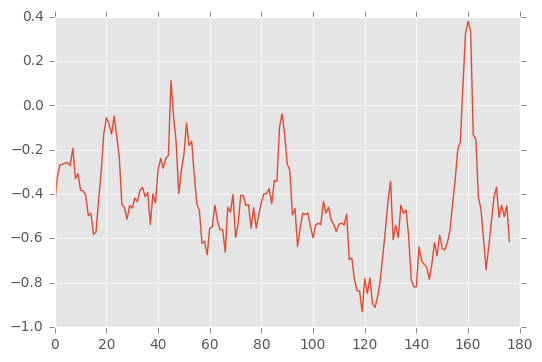

In [266]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [267]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.0348
Epoch 2/100
0s - loss: 0.0385
Epoch 3/100
0s - loss: 0.0301
Epoch 4/100
0s - loss: 0.0335
Epoch 5/100
0s - loss: 0.0286
Epoch 6/100
0s - loss: 0.0316
Epoch 7/100
0s - loss: 0.0307
Epoch 8/100
0s - loss: 0.0283
Epoch 9/100
0s - loss: 0.0286
Epoch 10/100
0s - loss: 0.0290
Epoch 11/100
0s - loss: 0.0268
Epoch 12/100
0s - loss: 0.0278
Epoch 13/100
0s - loss: 0.0282
Epoch 14/100
0s - loss: 0.0270
Epoch 15/100
0s - loss: 0.0260
Epoch 16/100
0s - loss: 0.0266
Epoch 17/100
0s - loss: 0.0287
Epoch 18/100
0s - loss: 0.0251
Epoch 19/100
0s - loss: 0.0255
Epoch 20/100
0s - loss: 0.0226
Epoch 21/100
0s - loss: 0.0247
Epoch 22/100
0s - loss: 0.0247
Epoch 23/100
0s - loss: 0.0258
Epoch 24/100
0s - loss: 0.0215
Epoch 25/100
0s - loss: 0.0219
Epoch 26/100
0s - loss: 0.0219
Epoch 27/100
0s - loss: 0.0232
Epoch 28/100
0s - loss: 0.0222
Epoch 29/100
0s - loss: 0.0214
Epoch 30/100
0s - loss: 0.0211
Epoch 31/100
0s - loss: 0.0194
Epoch 32/100
0s - loss: 0.0238
Epoch 33/100
0s -

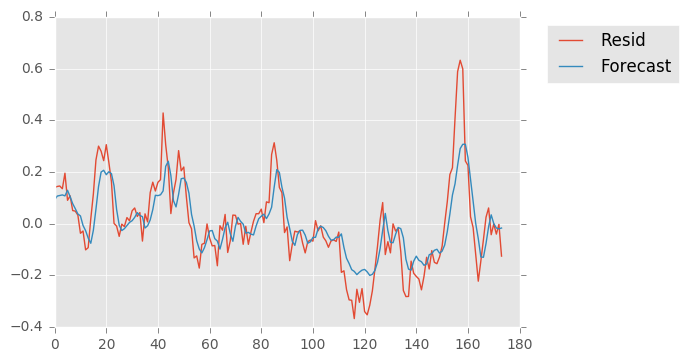

In [268]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [269]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

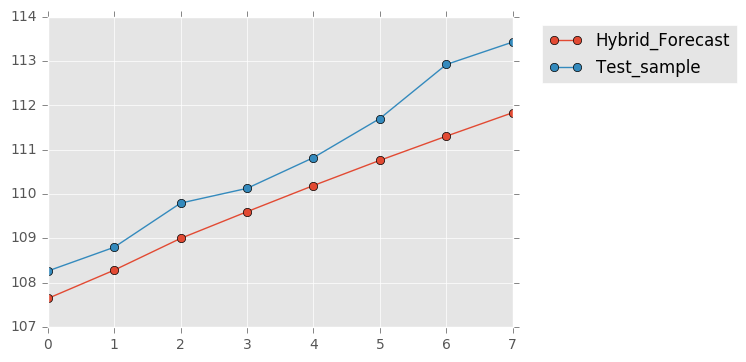

In [270]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [271]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 0.90601180915797208,
 'MSE': 1.0020045623482043,
 'RMSE': 1.0010017793931258}

In [272]:
nn_resids_forecast

array([-0.75836349, -0.72971582, -0.65177125, -0.62143546, -0.58950579,
       -0.56832927, -0.54991251, -0.53552055], dtype=float32)

---

---

---

# Household consumption expenditures (for services)

In [273]:
hh_consump_serv = df.iloc[58, 1:186].copy()
hh_consump_serv.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   0.742798
p-value                          0.990654
#Lags Used                       6.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (10%)            -2.575501
Critical Value (5%)             -2.877918
dtype: float64


Results of KPSS Test:
Test Statistic            1.334034
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


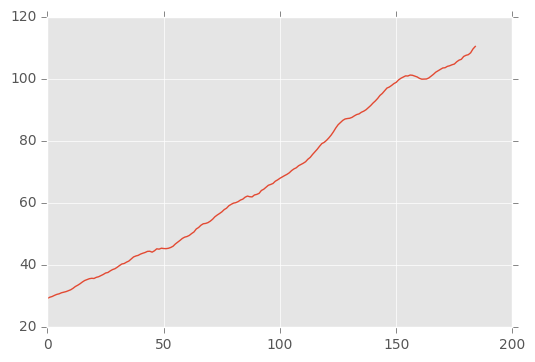

In [274]:
test_stationarity(hh_consump_serv)

Results of Dickey-Fuller Test:
Test Statistic                  -3.408599
p-value                          0.010669
#Lags Used                       5.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (10%)            -2.575501
Critical Value (5%)             -2.877918
dtype: float64


Results of KPSS Test:
Test Statistic            0.22775
p-value                   0.10000
#Lags Used               14.00000
Critical Value (1%)       0.73900
Critical Value (10%)      0.34700
Critical Value (2.5%)     0.57400
Critical Value (5%)       0.46300
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


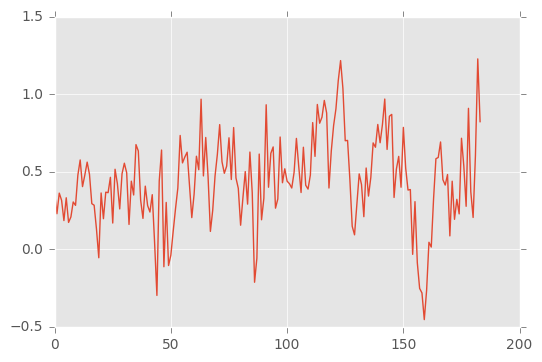

In [275]:
test_stationarity(diff_series(hh_consump_serv))

In [277]:
train = hh_consump_serv[:-8]
test = hh_consump_serv[-8:]

### ARIMA

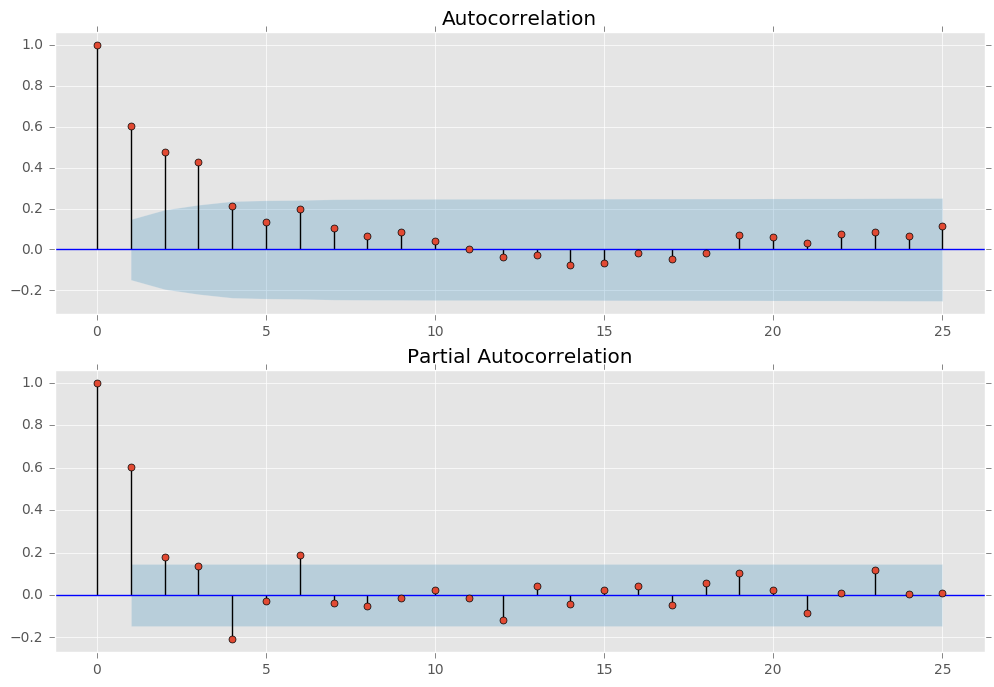

In [278]:
correlogram(diff_series(train))

In [279]:
arima_model = ARIMA(np.array(train), order=(2,1,1)).fit(trend='nc')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  176
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  10.639
Method:                       css-mle   S.D. of innovations              0.226
Date:                Tue, 09 May 2017   AIC                            -13.277
Time:                        02:53:26   BIC                             -0.596
Sample:                             1   HQIC                            -8.134
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      1.5564      0.054     29.040      0.000       1.451       1.661
ar.L2.D.y     -0.5571      0.053    -10.507      0.000      -0.661      -0.453
ma.L1.D.y     -0.9549      0.037    -25.752      0.0

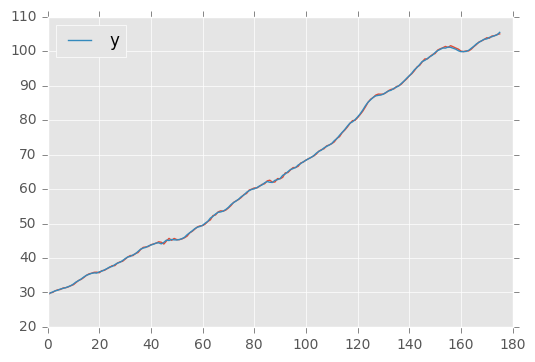

In [280]:
arima_model.plot_predict()
plt.show()

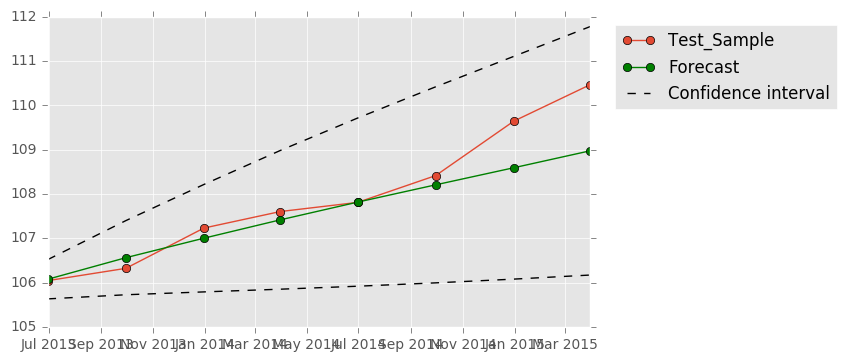

In [281]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [282]:
errors_out_sample(test, forc_arima[0])

{'MAE': 0.43113559429232673,
 'MSE': 0.44094568249046412,
 'RMSE': 0.66403741046003129}

### ANN

In [283]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.1319
Epoch 2/100
0s - loss: 0.1102
Epoch 3/100
0s - loss: 0.1027
Epoch 4/100
0s - loss: 0.1053
Epoch 5/100
0s - loss: 0.1016
Epoch 6/100
0s - loss: 0.1000
Epoch 7/100
0s - loss: 0.0940
Epoch 8/100
0s - loss: 0.0938
Epoch 9/100
0s - loss: 0.0898
Epoch 10/100
0s - loss: 0.0842
Epoch 11/100
0s - loss: 0.0831
Epoch 12/100
0s - loss: 0.0694
Epoch 13/100
0s - loss: 0.0637
Epoch 14/100
0s - loss: 0.0595
Epoch 15/100
0s - loss: 0.0430
Epoch 16/100
0s - loss: 0.0472
Epoch 17/100
0s - loss: 0.0302
Epoch 18/100
0s - loss: 0.0285
Epoch 19/100
0s - loss: 0.0287
Epoch 20/100
0s - loss: 0.0307
Epoch 21/100
0s - loss: 0.0259
Epoch 22/100
0s - loss: 0.0330
Epoch 23/100
0s - loss: 0.0300
Epoch 24/100
0s - loss: 0.0255
Epoch 25/100
0s - loss: 0.0260
Epoch 26/100
0s - loss: 0.0247
Epoch 27/100
0s - loss: 0.0228
Epoch 28/100
0s - loss: 0.0195
Epoch 29/100
0s - loss: 0.0202
Epoch 30/100
0s - loss: 0.0210
Epoch 31/100
0s - loss: 0.0259
Epoch 32/100
0s - loss: 0.0156
Epoch 33/100
0s -

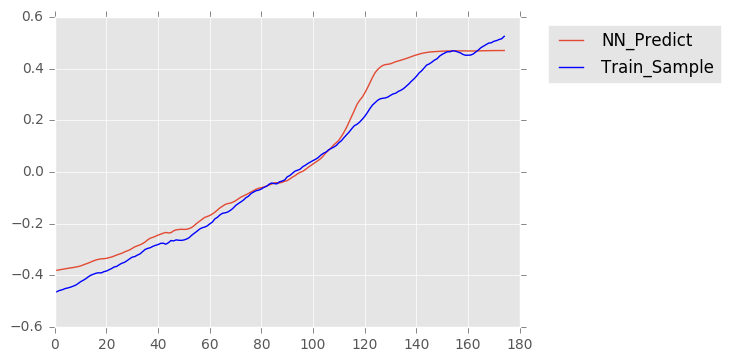

In [284]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

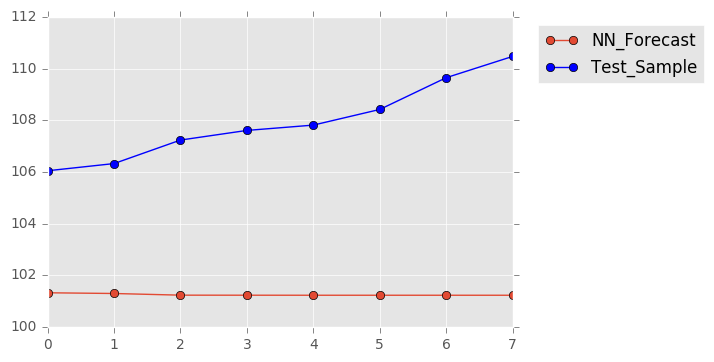

In [285]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [286]:
errors_out_sample(test, nn_forecast)

{'MAE': 6.6974300231933608,
 'MSE': 46.978178662449388,
 'RMSE': 6.8540629310248811}

### Hybrid

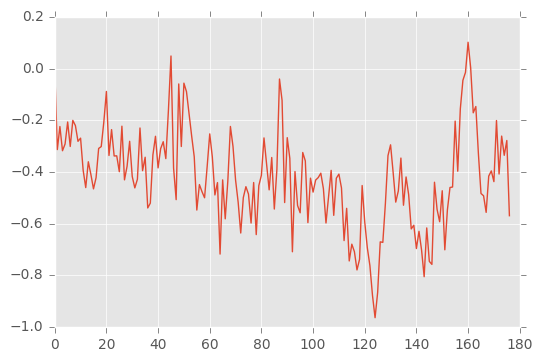

In [287]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [288]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.0428
Epoch 2/100
0s - loss: 0.0423
Epoch 3/100
0s - loss: 0.0363
Epoch 4/100
0s - loss: 0.0332
Epoch 5/100
0s - loss: 0.0337
Epoch 6/100
0s - loss: 0.0310
Epoch 7/100
0s - loss: 0.0338
Epoch 8/100
0s - loss: 0.0309
Epoch 9/100
0s - loss: 0.0329
Epoch 10/100
0s - loss: 0.0319
Epoch 11/100
0s - loss: 0.0304
Epoch 12/100
0s - loss: 0.0305
Epoch 13/100
0s - loss: 0.0315
Epoch 14/100
0s - loss: 0.0312
Epoch 15/100
0s - loss: 0.0301
Epoch 16/100
0s - loss: 0.0303
Epoch 17/100
0s - loss: 0.0301
Epoch 18/100
0s - loss: 0.0306
Epoch 19/100
0s - loss: 0.0290
Epoch 20/100
0s - loss: 0.0315
Epoch 21/100
0s - loss: 0.0295
Epoch 22/100
0s - loss: 0.0306
Epoch 23/100
0s - loss: 0.0294
Epoch 24/100
0s - loss: 0.0306
Epoch 25/100
0s - loss: 0.0305
Epoch 26/100
0s - loss: 0.0277
Epoch 27/100
0s - loss: 0.0283
Epoch 28/100
0s - loss: 0.0269
Epoch 29/100
0s - loss: 0.0273
Epoch 30/100
0s - loss: 0.0263
Epoch 31/100
0s - loss: 0.0269
Epoch 32/100
0s - loss: 0.0251
Epoch 33/100
0s -

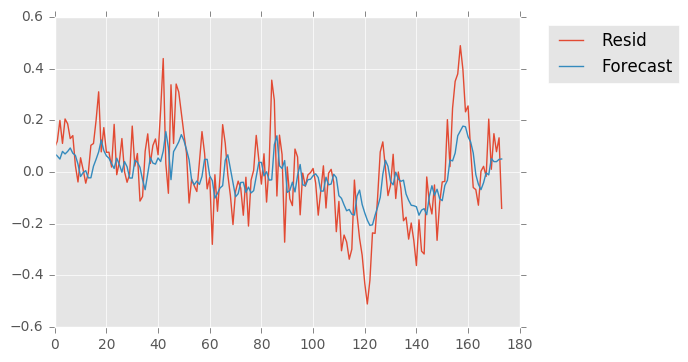

In [289]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [290]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

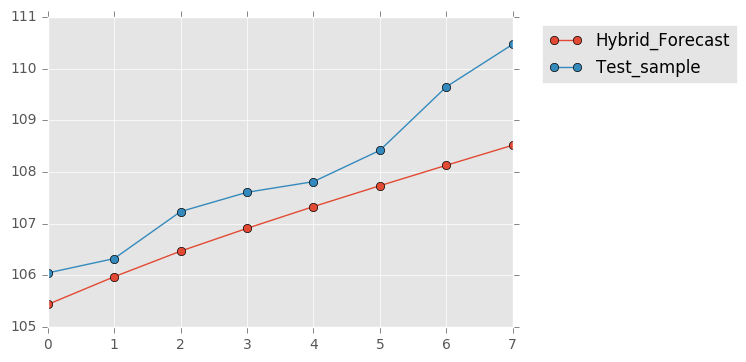

In [291]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [292]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 0.88292015994400508,
 'MSE': 1.0488843631439111,
 'RMSE': 1.02415055687331}

In [293]:
nn_resids_forecast

array([-0.64118046, -0.5919944 , -0.53701878, -0.51006126, -0.48876661,
       -0.47557533, -0.46620107, -0.45998284], dtype=float32)

---

---

---

# Saving and Investment by Sector

In [294]:
sav_inv_sec = df.iloc[63, 1:186].copy()
sav_inv_sec.index = pd.DatetimeIndex(start='1969-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   1.153398
p-value                          0.995648
#Lags Used                      14.000000
Number of Observations Used    170.000000
Critical Value (1%)             -3.469413
Critical Value (10%)            -2.575917
Critical Value (5%)             -2.878696
dtype: float64


Results of KPSS Test:
Test Statistic            1.325475
p-value                   0.010000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


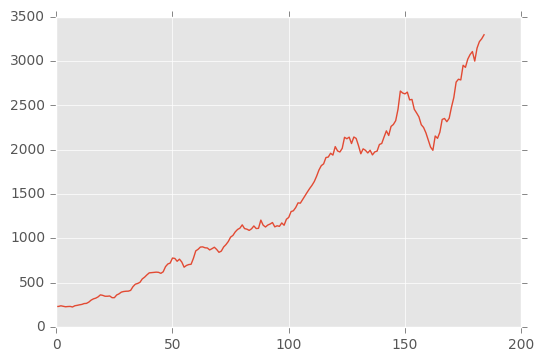

In [295]:
test_stationarity(sav_inv_sec)

Results of Dickey-Fuller Test:
Test Statistic                  -4.325188
p-value                          0.000402
#Lags Used                       3.000000
Number of Observations Used    180.000000
Critical Value (1%)             -3.467211
Critical Value (10%)            -2.575403
Critical Value (5%)             -2.877735
dtype: float64


Results of KPSS Test:
Test Statistic            0.191004
p-value                   0.100000
#Lags Used               14.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


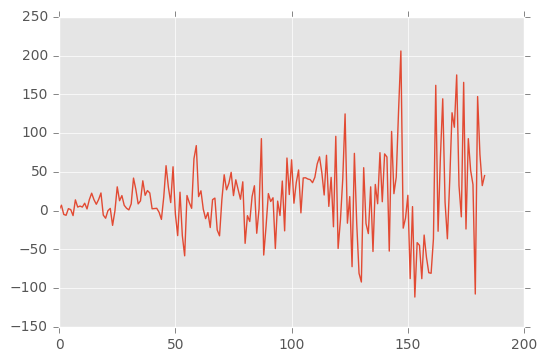

In [296]:
test_stationarity(diff_series(sav_inv_sec))

In [298]:
train = sav_inv_sec[:-8]
test = sav_inv_sec[-8:]

### ARIMA

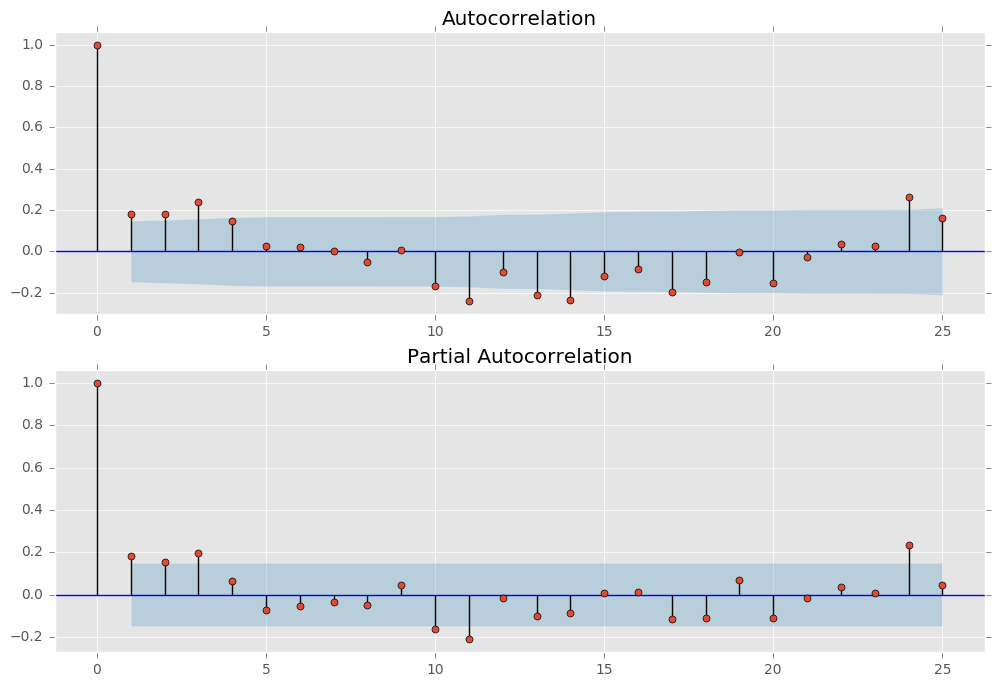

In [299]:
correlogram(diff_series(train))

In [300]:
arima_model = ARIMA(np.array(train), order=(1,1,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  176
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -928.265
Method:                       css-mle   S.D. of innovations             47.227
Date:                Tue, 09 May 2017   AIC                           1864.530
Time:                        02:55:23   BIC                           1877.212
Sample:                             1   HQIC                          1869.674
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5351      6.275      2.476      0.014       3.237      27.834
ar.L1.D.y      0.7750      0.099      7.834      0.000       0.581       0.969
ma.L1.D.y     -0.5993      0.115     -5.200      0.0

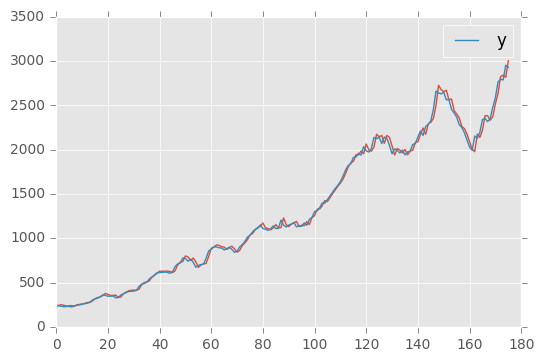

In [301]:
arima_model.plot_predict()
plt.show()

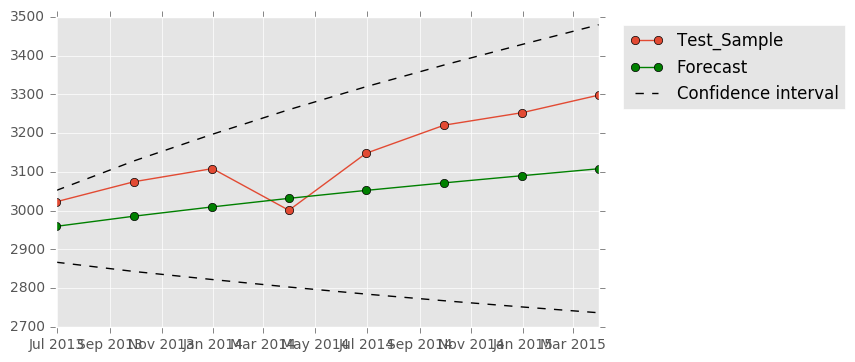

In [302]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

In [303]:
errors_out_sample(test, forc_arima[0])

{'MAE': 109.9363015871773,
 'MSE': 14572.569237804189,
 'RMSE': 120.71689706832341}

### ANN

In [304]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.2437
Epoch 2/100
0s - loss: 0.1087
Epoch 3/100
0s - loss: 0.1142
Epoch 4/100
0s - loss: 0.0943
Epoch 5/100
0s - loss: 0.0901
Epoch 6/100
0s - loss: 0.0888
Epoch 7/100
0s - loss: 0.0870
Epoch 8/100
0s - loss: 0.0817
Epoch 9/100
0s - loss: 0.0765
Epoch 10/100
0s - loss: 0.0741
Epoch 11/100
0s - loss: 0.0814
Epoch 12/100
0s - loss: 0.0743
Epoch 13/100
0s - loss: 0.0709
Epoch 14/100
0s - loss: 0.0716
Epoch 15/100
0s - loss: 0.0633
Epoch 16/100
0s - loss: 0.0594
Epoch 17/100
0s - loss: 0.0591
Epoch 18/100
0s - loss: 0.0437
Epoch 19/100
0s - loss: 0.0452
Epoch 20/100
0s - loss: 0.0378
Epoch 21/100
0s - loss: 0.0324
Epoch 22/100
0s - loss: 0.0275
Epoch 23/100
0s - loss: 0.0268
Epoch 24/100
0s - loss: 0.0254
Epoch 25/100
0s - loss: 0.0300
Epoch 26/100
0s - loss: 0.0259
Epoch 27/100
0s - loss: 0.0195
Epoch 28/100
0s - loss: 0.0253
Epoch 29/100
0s - loss: 0.0215
Epoch 30/100
0s - loss: 0.0187
Epoch 31/100
0s - loss: 0.0226
Epoch 32/100
0s - loss: 0.0235
Epoch 33/100
0s -

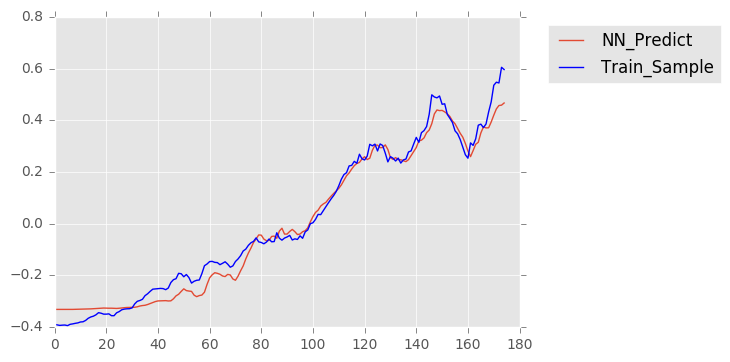

In [305]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

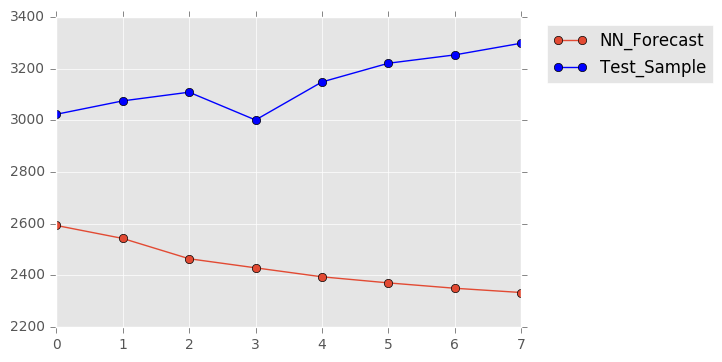

In [306]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [307]:
errors_out_sample(test, nn_forecast)

{'MAE': 706.56099853515627,
 'MSE': 531363.48749320803,
 'RMSE': 728.94683447643013}

### Hybrid

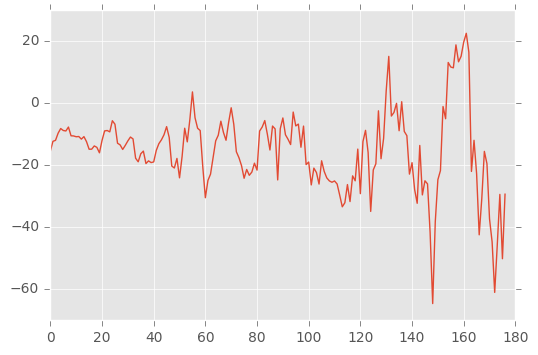

In [308]:
resids_arima = get_resids_arima(train, arima_model)
plt.plot(resids_arima)
plt.show()

In [309]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.8957
Epoch 2/100
0s - loss: 0.2953
Epoch 3/100
0s - loss: 0.2921
Epoch 4/100
0s - loss: 0.2080
Epoch 5/100
0s - loss: 0.1689
Epoch 6/100
0s - loss: 0.1250
Epoch 7/100
0s - loss: 0.1202
Epoch 8/100
0s - loss: 0.0982
Epoch 9/100
0s - loss: 0.0830
Epoch 10/100
0s - loss: 0.0710
Epoch 11/100
0s - loss: 0.0632
Epoch 12/100
0s - loss: 0.0427
Epoch 13/100
0s - loss: 0.0484
Epoch 14/100
0s - loss: 0.0441
Epoch 15/100
0s - loss: 0.0357
Epoch 16/100
0s - loss: 0.0402
Epoch 17/100
0s - loss: 0.0318
Epoch 18/100
0s - loss: 0.0331
Epoch 19/100
0s - loss: 0.0351
Epoch 20/100
0s - loss: 0.0327
Epoch 21/100
0s - loss: 0.0298
Epoch 22/100
0s - loss: 0.0292
Epoch 23/100
0s - loss: 0.0314
Epoch 24/100
0s - loss: 0.0253
Epoch 25/100
0s - loss: 0.0256
Epoch 26/100
0s - loss: 0.0296
Epoch 27/100
0s - loss: 0.0238
Epoch 28/100
0s - loss: 0.0257
Epoch 29/100
0s - loss: 0.0245
Epoch 30/100
0s - loss: 0.0259
Epoch 31/100
0s - loss: 0.0238
Epoch 32/100
0s - loss: 0.0247
Epoch 33/100
0s -

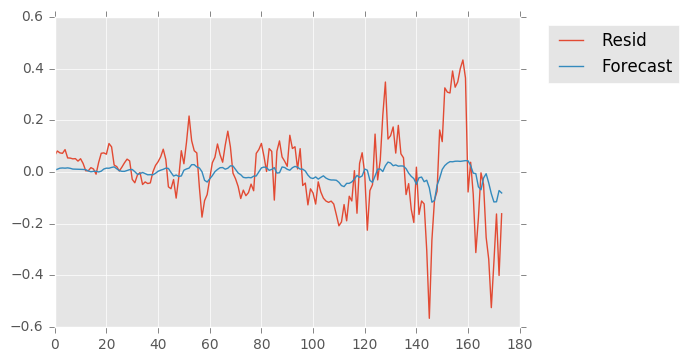

In [310]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [311]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

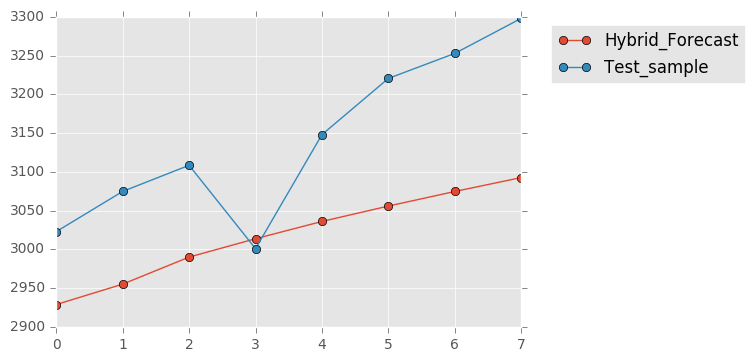

In [312]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [313]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 125.67115413959124,
 'MSE': 18872.983335881894,
 'RMSE': 137.37897705210173}

In [314]:
nn_resids_forecast

array([-30.62275696, -30.62273979, -19.62302208, -17.92562485,
       -16.20499802, -15.77394485, -15.51866055, -15.43832302], dtype=float32)

---

---

---

# GDP in billions of current dollars  (Seasonally adjusted annual rates)

In [315]:
US_GDP = df.iloc[67, 1:274].copy()
US_GDP.index = pd.DatetimeIndex(start='1947-01', end='2015-04', freq='Q')

Results of Dickey-Fuller Test:
Test Statistic                   3.354483
p-value                          1.000000
#Lags Used                      11.000000
Number of Observations Used    261.000000
Critical Value (1%)             -3.455656
Critical Value (10%)            -2.572705
Critical Value (5%)             -2.872678
dtype: float64


Results of KPSS Test:
Test Statistic            1.551114
p-value                   0.010000
#Lags Used               16.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


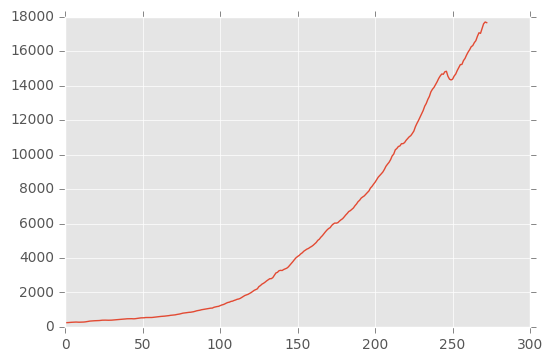

In [316]:
test_stationarity(US_GDP)

Results of Dickey-Fuller Test:
Test Statistic                  -1.720379
p-value                          0.420644
#Lags Used                      16.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (10%)            -2.572846
Critical Value (5%)             -2.872942
dtype: float64


Results of KPSS Test:
Test Statistic            1.471675
p-value                   0.010000
#Lags Used               16.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


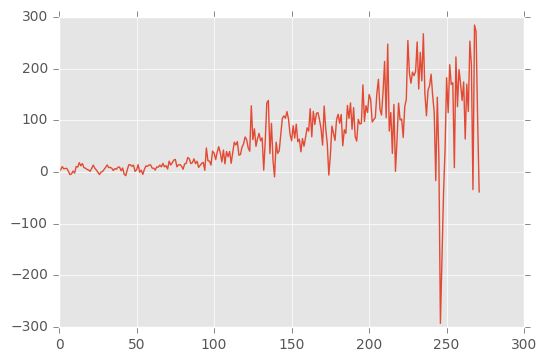

In [317]:
test_stationarity(diff_series(US_GDP))

Results of Dickey-Fuller Test:
Test Statistic                -6.915610e+00
p-value                        1.181648e-09
#Lags Used                     1.400000e+01
Number of Observations Used    2.560000e+02
Critical Value (1%)           -3.456155e+00
Critical Value (10%)          -2.572822e+00
Critical Value (5%)           -2.872897e+00
dtype: float64


Results of KPSS Test:
Test Statistic            0.094653
p-value                   0.100000
#Lags Used               16.000000
Critical Value (1%)       0.739000
Critical Value (10%)      0.347000
Critical Value (2.5%)     0.574000
Critical Value (5%)       0.463000
dtype: float64


/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


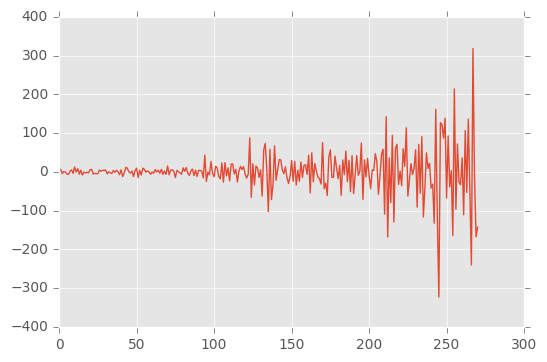

In [318]:
test_stationarity(diff_series(diff_series(US_GDP)))

In [320]:
train = US_GDP[:-8]
test = US_GDP[-8:]

### ARIMA

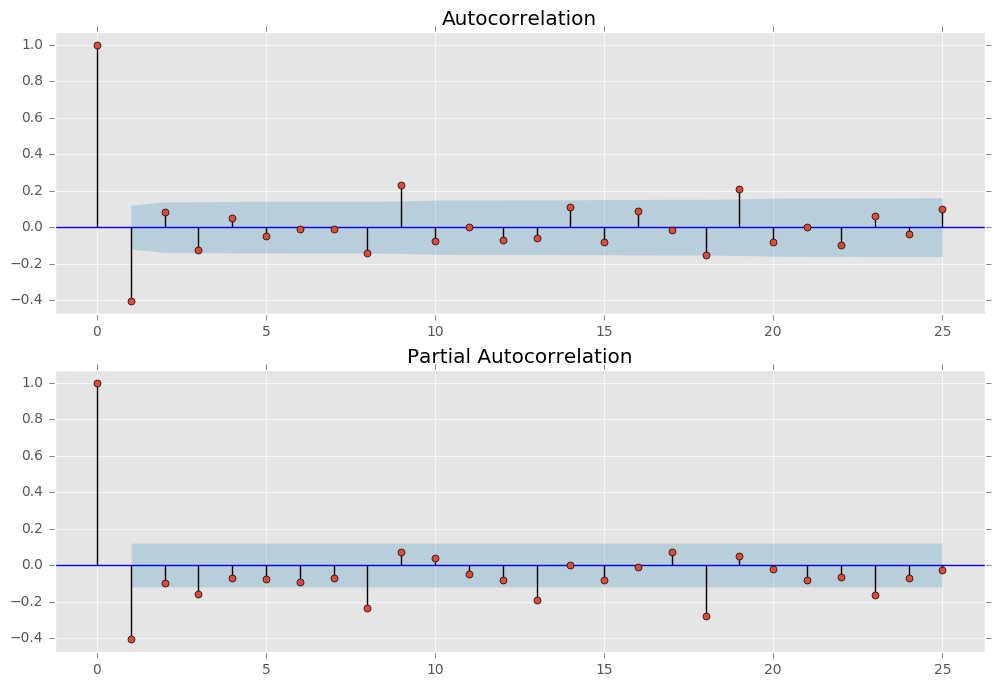

In [321]:
correlogram(diff_series(diff_series(train)))

In [322]:
arima_model = ARIMA(np.array(train), order=(2,2,1)).fit(trend='c')
print(arima_model.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  263
Model:                 ARIMA(2, 2, 1)   Log Likelihood               -1362.829
Method:                       css-mle   S.D. of innovations             42.740
Date:                Tue, 09 May 2017   AIC                           2735.657
Time:                        02:58:45   BIC                           2753.518
Sample:                             2   HQIC                          2742.835
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5977      0.085      7.017      0.000       0.431       0.765
ar.L1.D2.y     0.3932      0.061      6.488      0.000       0.274       0.512
ar.L2.D2.y     0.2109      0.061      3.466      0.0

/home/andrey/anaconda3/envs/neural_net/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


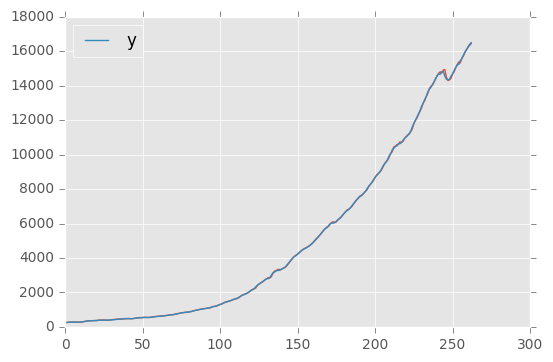

In [323]:
arima_model.plot_predict()
plt.show()

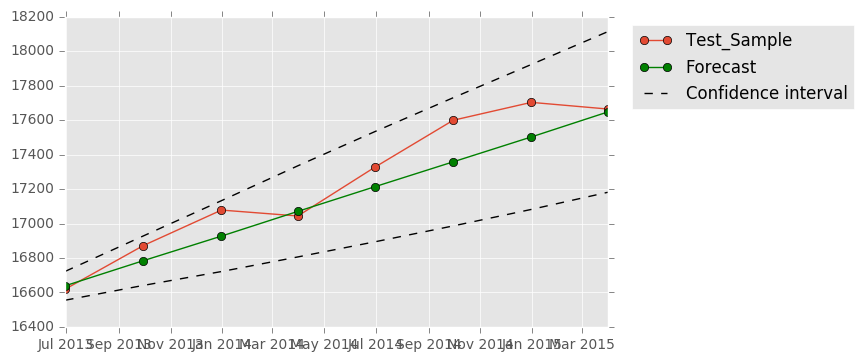

In [324]:
forc_arima = arima_model.forecast(len(test))
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1))

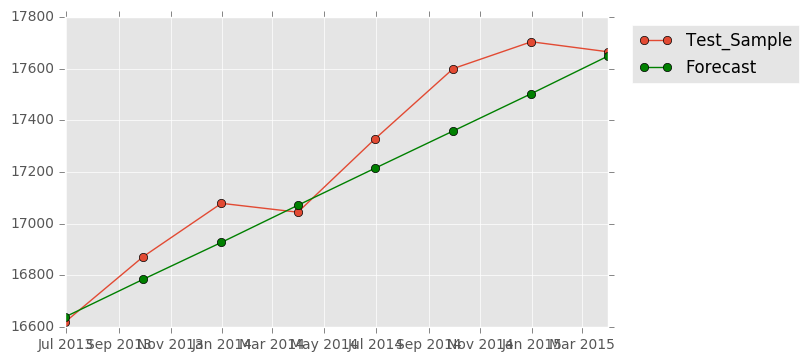

In [325]:
plot_forecast_out_only(test, forc_arima, bbox_loc=(1.03,1), conf_int=False)

In [326]:
errors_out_sample(test, forc_arima[0])

{'MAE': 107.3033775419035,
 'MSE': 17935.692466896642,
 'RMSE': 133.92420418616138}

### ANN

In [327]:
scaled_train = scaler(train)[0]

lags_for_nn = 2

train_nn = create_df_for_nn(scaled_train, lags_for_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

nn = assemble_model(lags_for_nn)
nn.fit(np.array(train_nn.iloc[:, :-1]), 
       np.array(train_nn.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.1275
Epoch 2/100
0s - loss: 0.0832
Epoch 3/100
0s - loss: 0.0682
Epoch 4/100
0s - loss: 0.0431
Epoch 5/100
0s - loss: 0.0149
Epoch 6/100
0s - loss: 0.0020
Epoch 7/100
0s - loss: 3.9326e-04
Epoch 8/100
0s - loss: 3.3589e-04
Epoch 9/100
0s - loss: 3.2921e-04
Epoch 10/100
0s - loss: 3.2606e-04
Epoch 11/100
0s - loss: 3.1913e-04
Epoch 12/100
0s - loss: 3.2728e-04
Epoch 13/100
0s - loss: 3.2267e-04
Epoch 14/100
0s - loss: 3.1212e-04
Epoch 15/100
0s - loss: 3.1773e-04
Epoch 16/100
0s - loss: 3.1339e-04
Epoch 17/100
0s - loss: 3.2319e-04
Epoch 18/100
0s - loss: 3.1119e-04
Epoch 19/100
0s - loss: 3.1896e-04
Epoch 20/100
0s - loss: 3.3880e-04
Epoch 21/100
0s - loss: 2.9710e-04
Epoch 22/100
0s - loss: 3.5303e-04
Epoch 23/100
0s - loss: 3.0051e-04
Epoch 24/100
0s - loss: 3.0208e-04
Epoch 25/100
0s - loss: 2.6817e-04
Epoch 26/100
0s - loss: 3.2444e-04
Epoch 27/100
0s - loss: 2.9149e-04
Epoch 28/100
0s - loss: 2.7515e-04
Epoch 29/100
0s - loss: 3.0018e-04
Epoch 30/100
0s - 

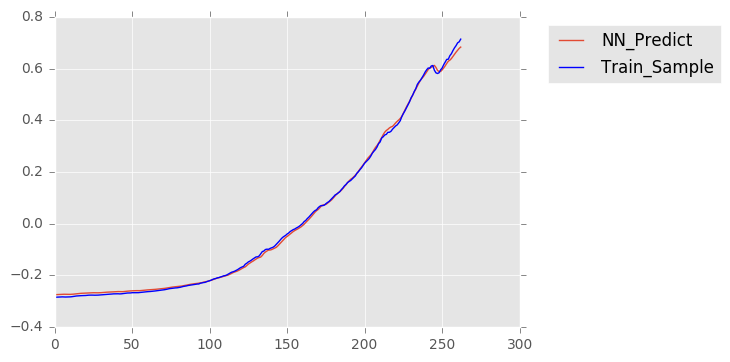

In [328]:
nn_plot_in_sample(nn, train_nn, bbox_loc=(1.45,1))

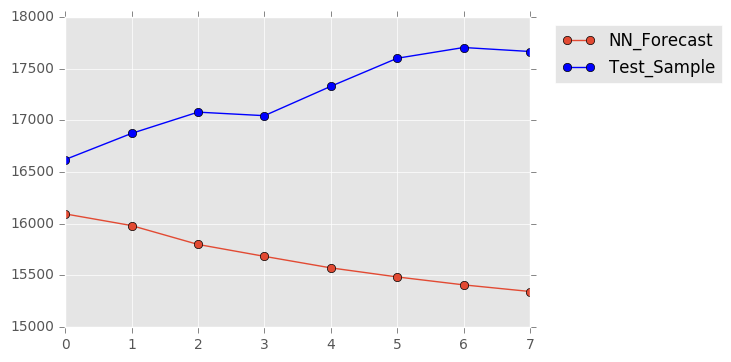

In [329]:
nn_scaled_forecast = nn_predict_series(nn, 
                                      last_obs_creator_nn(train_nn, lags_for_nn), 
                                      len(test))
nn_forecast = scaler_back(nn_scaled_forecast, scaler(train)[1], scaler(train)[2])

nn_plot_out_sample(nn_forecast, test, bbox_loc=(1.43,1))

In [330]:
errors_out_sample(test, nn_forecast)

{'MAE': 1569.07080078125,
 'MSE': 2850325.0323384092,
 'RMSE': 1688.2905651393096}

### Hybrid

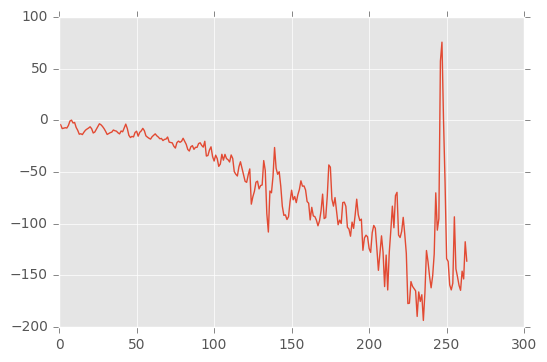

In [331]:
resids_arima = get_resids_arima(train, arima_model, d=2)
plt.plot(resids_arima)
plt.show()

In [332]:
scaled_resids_arima = scaler(resids_arima)[0]

lags_nn = 2

df_nn_resid = create_df_for_nn_residuals(scaled_resids_arima[1:], lags_nn)

def assemble_model(n_lags):
    model = Sequential()
    # Layers
    model.add(Dense(10, input_dim=n_lags, activation='sigmoid'))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(10, input_dim=10, activation='sigmoid'))
    model.add(Dense(1, input_dim=10))
    # Compilation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return(model)

nn_resid = assemble_model(lags_nn)
nn_resid.fit(np.array(df_nn_resid.iloc[:, :-1]), 
       np.array(df_nn_resid.iloc[:, -1]), 
       nb_epoch=100, 
       verbose=2,
       batch_size=1)

Epoch 1/100
1s - loss: 0.1073
Epoch 2/100
0s - loss: 0.0447
Epoch 3/100
0s - loss: 0.0383
Epoch 4/100
0s - loss: 0.0384
Epoch 5/100
0s - loss: 0.0377
Epoch 6/100
0s - loss: 0.0353
Epoch 7/100
0s - loss: 0.0359
Epoch 8/100
1s - loss: 0.0363
Epoch 9/100
0s - loss: 0.0338
Epoch 10/100
0s - loss: 0.0331
Epoch 11/100
1s - loss: 0.0327
Epoch 12/100
0s - loss: 0.0299
Epoch 13/100
0s - loss: 0.0288
Epoch 14/100
0s - loss: 0.0232
Epoch 15/100
0s - loss: 0.0202
Epoch 16/100
0s - loss: 0.0211
Epoch 17/100
0s - loss: 0.0204
Epoch 18/100
0s - loss: 0.0201
Epoch 19/100
0s - loss: 0.0184
Epoch 20/100
0s - loss: 0.0188
Epoch 21/100
0s - loss: 0.0141
Epoch 22/100
0s - loss: 0.0164
Epoch 23/100
0s - loss: 0.0133
Epoch 24/100
0s - loss: 0.0138
Epoch 25/100
0s - loss: 0.0131
Epoch 26/100
0s - loss: 0.0158
Epoch 27/100
0s - loss: 0.0123
Epoch 28/100
0s - loss: 0.0121
Epoch 29/100
0s - loss: 0.0147
Epoch 30/100
0s - loss: 0.0128
Epoch 31/100
0s - loss: 0.0130
Epoch 32/100
0s - loss: 0.0121
Epoch 33/100
0s -

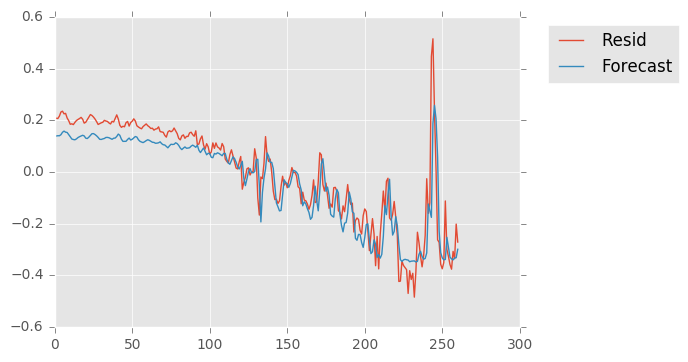

In [333]:
plt.plot(np.array(df_nn_resid.iloc[:, -1]), label='Resid')
plt.plot(nn_resid.predict(np.array(df_nn_resid.iloc[:, :-1])), label='Forecast')
plt.legend(bbox_to_anchor=(1.36,1), loc='best')
plt.show()

In [334]:
nn_scaled_resid_forecast = nn_predict_series(nn_resid, 
                                      last_lags_resid_df_for_nn(resids_arima, test, lags_nn), 
                                      len(test))

nn_resids_forecast = scaler_back(nn_scaled_resid_forecast, scaler(resids_arima)[1], scaler(resids_arima)[2])

hybrid_forecast = hybrid_predict_series(forc_arima, nn_resids_forecast)

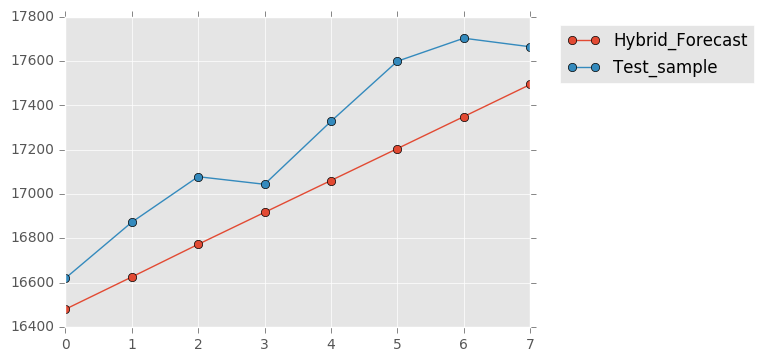

In [335]:
hybrid_plot_forecast(forc_arima, nn_resids_forecast, test)

In [336]:
errors_out_sample(test, hybrid_forecast)

{'MAE': 250.65874148127932,
 'MSE': 71418.9493178743,
 'RMSE': 267.24323998536295}

In [337]:
nn_resids_forecast

array([-159.32824707, -159.32824707, -154.33932495, -153.72631836,
       -153.29177856, -153.18295288, -153.13412476, -153.11859131], dtype=float32)